In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

# Set the maximum number of columns to display in the output
pd.set_option('display.max_columns', 50)

# Set the plot style
plt.style.use('bmh')

# Extract color palette for cycling through plot colors
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(color_pal)

# Now the rest of your code can follow


## Loading and printing the datasets

In [3]:
calender = pd.read_csv('/kaggle/input/m5-dataset/calendar.csv')
calender

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [4]:
sales_tr_ev = pd.read_csv('/kaggle/input/m5-dataset/sales_train_evaluation.csv')
sales_tr_ev

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,...,2,2,0,0,0,2,0,0,1,1,1,0,0,1,0,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,...,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,...,1,0,2,1,1,0,0,1,0,0,1,0,3,3,1,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,1,0,2,1,1,2,0,2,1,1,0,2,1,1,1,1,4,6,0,1,1,1,0


In [5]:
sales_tr_val = pd.read_csv('/kaggle/input/m5-dataset/sales_train_validation.csv')
sales_tr_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,...,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,...,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3


In [6]:
# Submission file should look like this
# Our aim is to forecast the sales of next 28 days

sample_sub = pd.read_csv('/kaggle/input/m5-dataset/sample_submission.csv')
sample_sub

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
sell_price = pd.read_csv('/kaggle/input/m5-dataset/sell_prices.csv')
sell_price

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


###  Visualising the sales for a specific item to understand the trend

In [8]:
d_cols=[c for c in sales_tr_val.columns if 'd_' in c]

# Filter the data for a specific item
filtered_data = sales_tr_val.loc[sales_tr_val['id'] == 'FOODS_3_090_CA_3_validation']

# Set the 'id' as the index and select only the sales data columns (those starting with 'd_')
sales_data = filtered_data.set_index('id')[d_cols]

In [8]:
len(d_cols)

1913

In [10]:
train_dataset = sales_tr_val[d_cols[-100:-30]]
val_dataset = sales_tr_val[d_cols[-30:]]

In [11]:
train_dataset.shape

(30490, 70)

In [12]:
val_dataset.shape

(30490, 30)

In [13]:
train_dataset.iloc[0]

d_1814    0
d_1815    0
d_1816    0
d_1817    2
d_1818    1
         ..
d_1879    1
d_1880    2
d_1881    2
d_1882    0
d_1883    1
Name: 0, Length: 70, dtype: int64

In [14]:
train_dataset.iloc[0].keys()

Index(['d_1814', 'd_1815', 'd_1816', 'd_1817', 'd_1818', 'd_1819', 'd_1820',
       'd_1821', 'd_1822', 'd_1823', 'd_1824', 'd_1825', 'd_1826', 'd_1827',
       'd_1828', 'd_1829', 'd_1830', 'd_1831', 'd_1832', 'd_1833', 'd_1834',
       'd_1835', 'd_1836', 'd_1837', 'd_1838', 'd_1839', 'd_1840', 'd_1841',
       'd_1842', 'd_1843', 'd_1844', 'd_1845', 'd_1846', 'd_1847', 'd_1848',
       'd_1849', 'd_1850', 'd_1851', 'd_1852', 'd_1853', 'd_1854', 'd_1855',
       'd_1856', 'd_1857', 'd_1858', 'd_1859', 'd_1860', 'd_1861', 'd_1862',
       'd_1863', 'd_1864', 'd_1865', 'd_1866', 'd_1867', 'd_1868', 'd_1869',
       'd_1870', 'd_1871', 'd_1872', 'd_1873', 'd_1874', 'd_1875', 'd_1876',
       'd_1877', 'd_1878', 'd_1879', 'd_1880', 'd_1881', 'd_1882', 'd_1883'],
      dtype='object')

In [15]:
# Utility function to plot graph
def plot_graphs(ids=[0,2], pred=[], pred_value=False):
    fig, axs = plt.subplots(len(ids), 1, figsize=(20,5))
    if len(ids)!=1 : axs = axs.flatten()
    
    if len(ids)==1:
        axs.plot(list(train_dataset.loc[ids[0]].keys()), train_dataset.loc[ids[0]].values)
        axs.plot(list(val_dataset.loc[ids[0]].keys()), val_dataset.loc[ids[0]].values)
        if pred_value and pred.any():
            axs.plot(list(val_dataset.loc[ids[0]].keys()), pred[ids[0]])
        axs.tick_params(axis='x', rotation=90)
    else:
        ax_id=0
        for i in ids:
            axs[ax_id].plot(list(train_dataset.loc[i].keys()), train_dataset.loc[i].values)
            axs[ax_id].plot(list(val_dataset.loc[i].keys()), val_dataset.loc[i].values)
            if pred_value and pred.any():
                axs[ax_id].plot(list(val_dataset.loc[i].keys()), pred[i])
            axs[ax_id].tick_params(axis='x', rotation=90)
            ax_id+=1
    plt.suptitle('Plot of few items with train and validation data respectively')
    plt.tight_layout()
    plt.show()

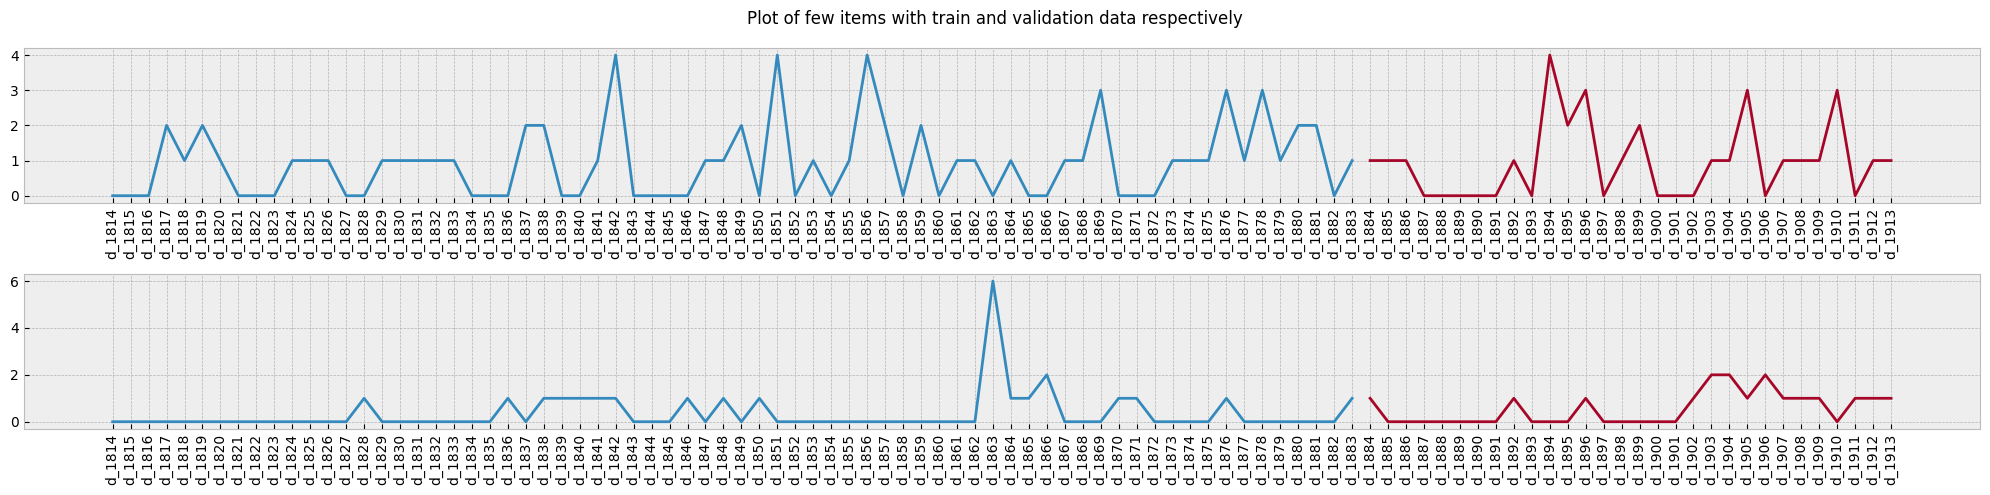

In [16]:
ids = [0, 2]
plot_graphs(ids, [], False)

In [17]:
def moving_average(window=30):
    predictions = []
    for i in range(0, len(val_dataset.columns)):
        if i==0:
            predictions.append(np.mean(train_dataset[train_dataset.columns[-window:]].values, axis=1))
        if i>0 and i<=window:
            predictions.append(np.mean(train_dataset[train_dataset.columns[-window+i:]].values, axis=1) + np.mean(val_dataset[val_dataset.columns[:i]].values, axis=1))
        if i>(window+1):
            predictions.append(np.mean(val_dataset[val_dataset.columns[:i]].values, axis=1))
    predictions=np.transpose(np.array([list(row) for row in predictions]))
    error_norm = np.linalg.norm(predictions[:3]-val_dataset[:3]/len(predictions[0]))
    return predictions, float(error_norm)

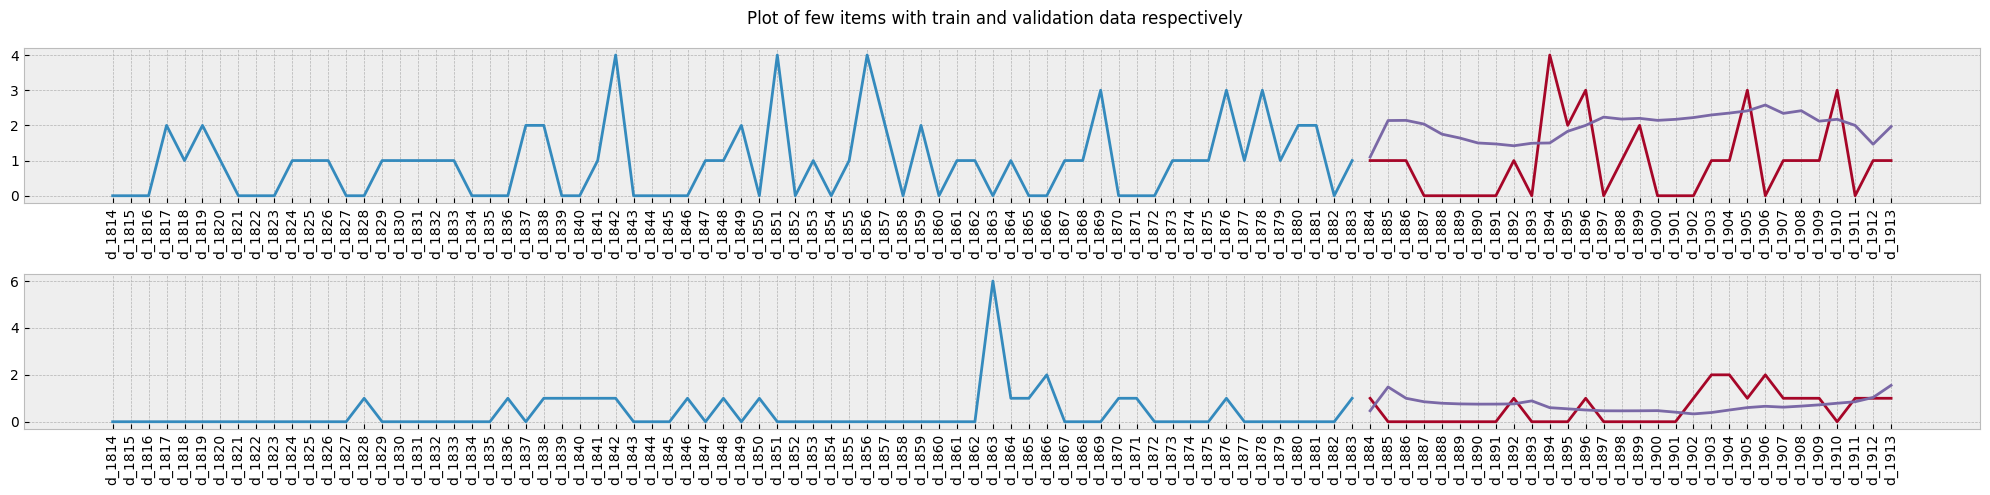

In [18]:
ids=[0, 2]
pred, error_moving = moving_average()
plot_graphs(ids, pred, True)

In [19]:
error_moving

12.206935492097351

In [12]:
def moving_average(window=30, forecast_days=28):
    # Predictions for the validation set
    predictions = []
    for i in range(0, len(val_dataset.columns)):
        if i == 0:
            predictions.append(np.mean(train_dataset[train_dataset.columns[-window:]].values, axis=1))
        elif i > 0 and i <= window:
            predictions.append(np.mean(train_dataset[train_dataset.columns[-window+i:]].values, axis=1) + np.mean(val_dataset[val_dataset.columns[:i]].values, axis=1))
        else:
            predictions.append(np.mean(val_dataset[val_dataset.columns[i-window:i]].values, axis=1))
    
    # Forecasting future values after validation period
    forecast_predictions = []
    last_window_data = val_dataset[val_dataset.columns[-window:]].values
    for i in range(forecast_days):
        next_prediction = np.mean(last_window_data[:, -window:], axis=1)
        forecast_predictions.append(next_prediction)
        last_window_data = np.hstack((last_window_data[:, 1:], next_prediction[:, np.newaxis]))

    predictions = np.transpose(np.array([list(row) for row in predictions]))
    forecast_predictions = np.transpose(np.array([list(row) for row in forecast_predictions]))

    error_norm = np.linalg.norm(predictions[:3] - val_dataset[:3] / len(predictions[0]))

    return predictions, forecast_predictions, float(error_norm)

# Recalculate predictions and error
pred, forecast_pred, error_moving = moving_average()

In [17]:
'''
ids=[0, 2]
# Utility function to plot graph
def plot_graphs2(ids=[0, 2], pred=[], forecast_pred=[], pred_value=False):
    fig, axs = plt.subplots(len(ids), 2, figsize=(20, 10))  # 2 columns for validation and forecast

    if len(ids) != 1:
        axs = axs.flatten()
    
    for idx, i in enumerate(ids):
        # Plotting validation data
        axs[2*idx].plot(list(train_dataset.loc[i].keys()), train_dataset.loc[i].values, label='Train')
        axs[2*idx].plot(list(val_dataset.loc[i].keys()), val_dataset.loc[i].values, label='Validation')
        if pred_value and pred.any():
            axs[2*idx].plot(list(val_dataset.loc[i].keys()), pred[i], label='Prediction')
        axs[2*idx].tick_params(axis='x', rotation=90)
        axs[2*idx].set_title(f'Validation Data for ID: {i}')
        axs[2*idx].legend()

        # Plotting forecast data
        future_dates = [f"day_{len(d_cols) + j + 1}" for j in range(forecast_pred.shape[1])]
        axs[2*idx + 1].plot(future_dates, forecast_pred[i], label='Forecast')
        axs[2*idx + 1].tick_params(axis='x', rotation=90)
        axs[2*idx + 1].set_title(f'Forecast Data for ID: {i}')
        axs[2*idx + 1].legend()

    plt.suptitle('Plot of few items with train, validation, and forecast data respectively')
    plt.tight_layout()
    plt.show()

# Plotting results
plot_graphs2(ids, pred, forecast_pred, True)'''


'\nids=[0, 2]\n# Utility function to plot graph\ndef plot_graphs2(ids=[0, 2], pred=[], forecast_pred=[], pred_value=False):\n    fig, axs = plt.subplots(len(ids), 2, figsize=(20, 10))  # 2 columns for validation and forecast\n\n    if len(ids) != 1:\n        axs = axs.flatten()\n    \n    for idx, i in enumerate(ids):\n        # Plotting validation data\n        axs[2*idx].plot(list(train_dataset.loc[i].keys()), train_dataset.loc[i].values, label=\'Train\')\n        axs[2*idx].plot(list(val_dataset.loc[i].keys()), val_dataset.loc[i].values, label=\'Validation\')\n        if pred_value and pred.any():\n            axs[2*idx].plot(list(val_dataset.loc[i].keys()), pred[i], label=\'Prediction\')\n        axs[2*idx].tick_params(axis=\'x\', rotation=90)\n        axs[2*idx].set_title(f\'Validation Data for ID: {i}\')\n        axs[2*idx].legend()\n\n        # Plotting forecast data\n        future_dates = [f"day_{len(d_cols) + j + 1}" for j in range(forecast_pred.shape[1])]\n        axs[2*idx 

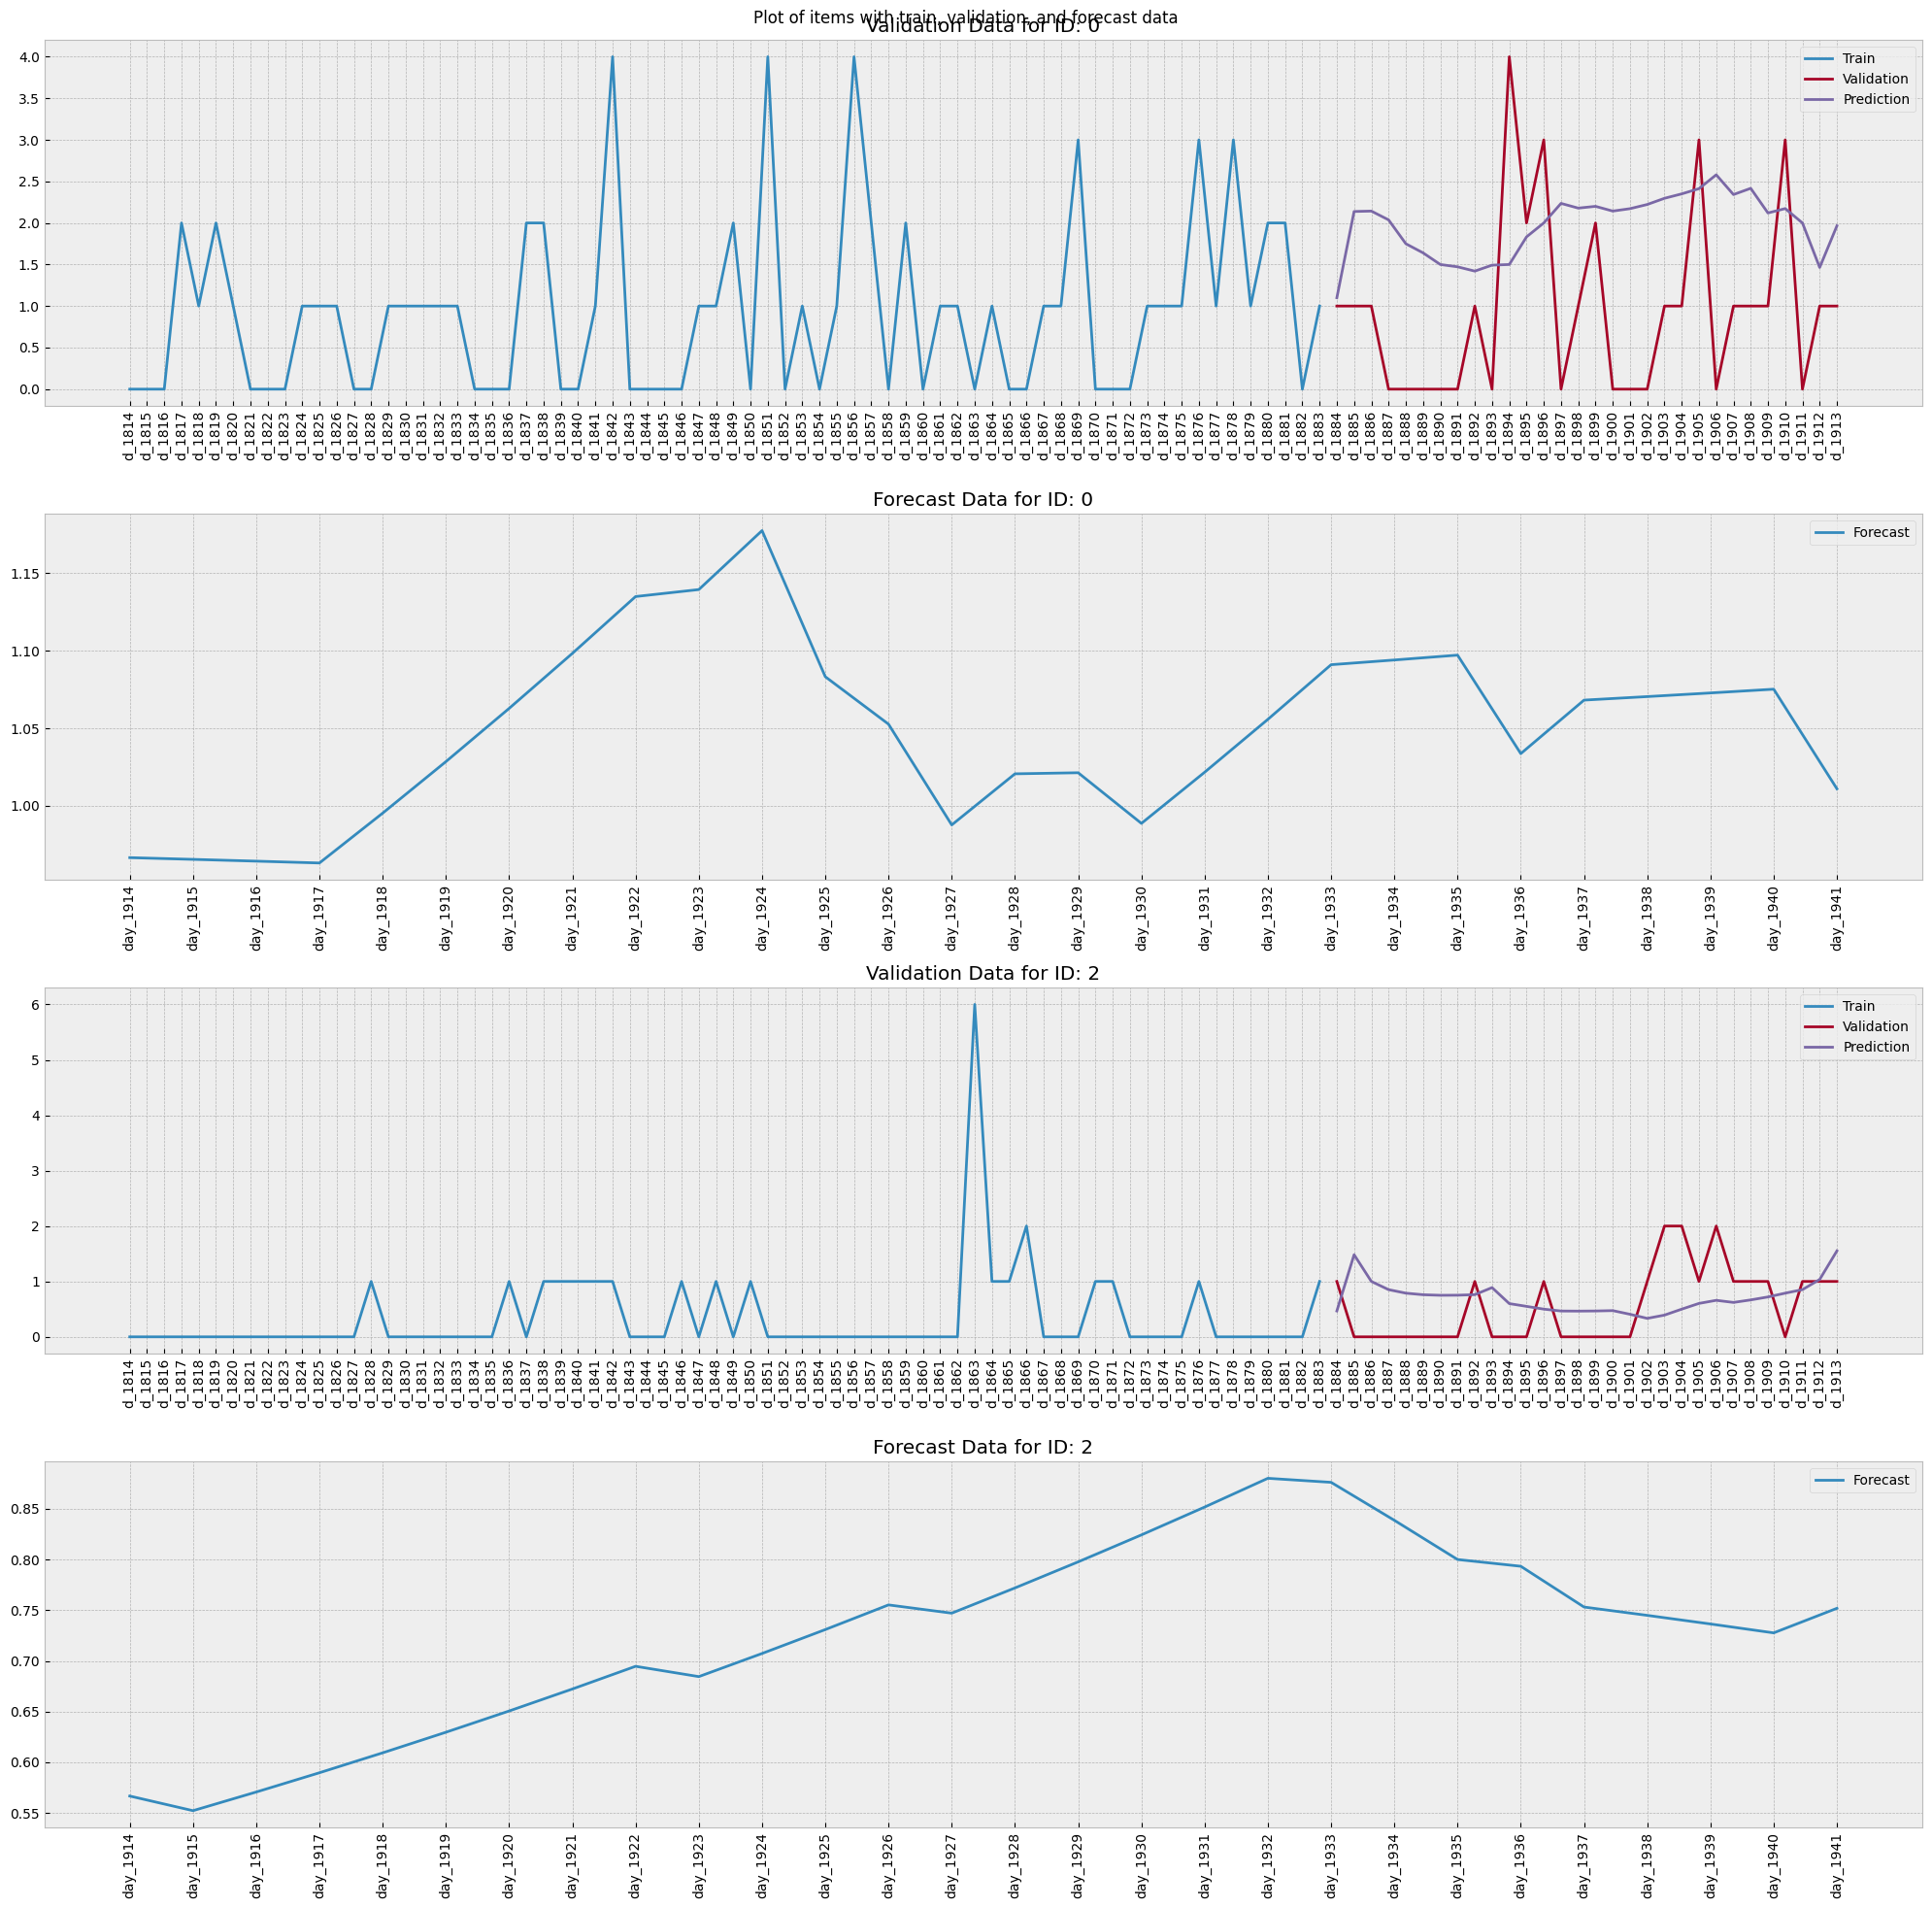

In [16]:
# Utility function to plot graph
def plot_graphs3(ids=[0, 2], pred=[], forecast_pred=[], pred_value=False):
    fig, axs = plt.subplots(len(ids) * 2, 1, figsize=(20, 5 * len(ids) * 2))  # 2 rows per ID for validation and forecast

    if len(ids) == 1:
        axs = [axs]  # Ensure axs is a list even for a single subplot

    for idx, i in enumerate(ids):
        # Plotting validation data
        axs[2*idx].plot(list(train_dataset.loc[i].keys()), train_dataset.loc[i].values, label='Train')
        axs[2*idx].plot(list(val_dataset.loc[i].keys()), val_dataset.loc[i].values, label='Validation')
        if pred_value and pred.any():
            axs[2*idx].plot(list(val_dataset.loc[i].keys()), pred[i], label='Prediction')
        axs[2*idx].tick_params(axis='x', rotation=90)
        axs[2*idx].set_title(f'Validation Data for ID: {i}')
        axs[2*idx].legend()

        # Plotting forecast data
        future_dates = [f"day_{len(d_cols) + j + 1}" for j in range(forecast_pred.shape[1])]
        axs[2*idx + 1].plot(future_dates, forecast_pred[i], label='Forecast')
        axs[2*idx + 1].tick_params(axis='x', rotation=90)
        axs[2*idx + 1].set_title(f'Forecast Data for ID: {i}')
        axs[2*idx + 1].legend()

    plt.suptitle('Plot of items with train, validation, and forecast data')
    print('\n')
    plt.tight_layout()
    plt.show()

# Plotting results
plot_graphs3(ids, pred, forecast_pred, True)


AttributeError: 'list' object has no attribute 'shape'

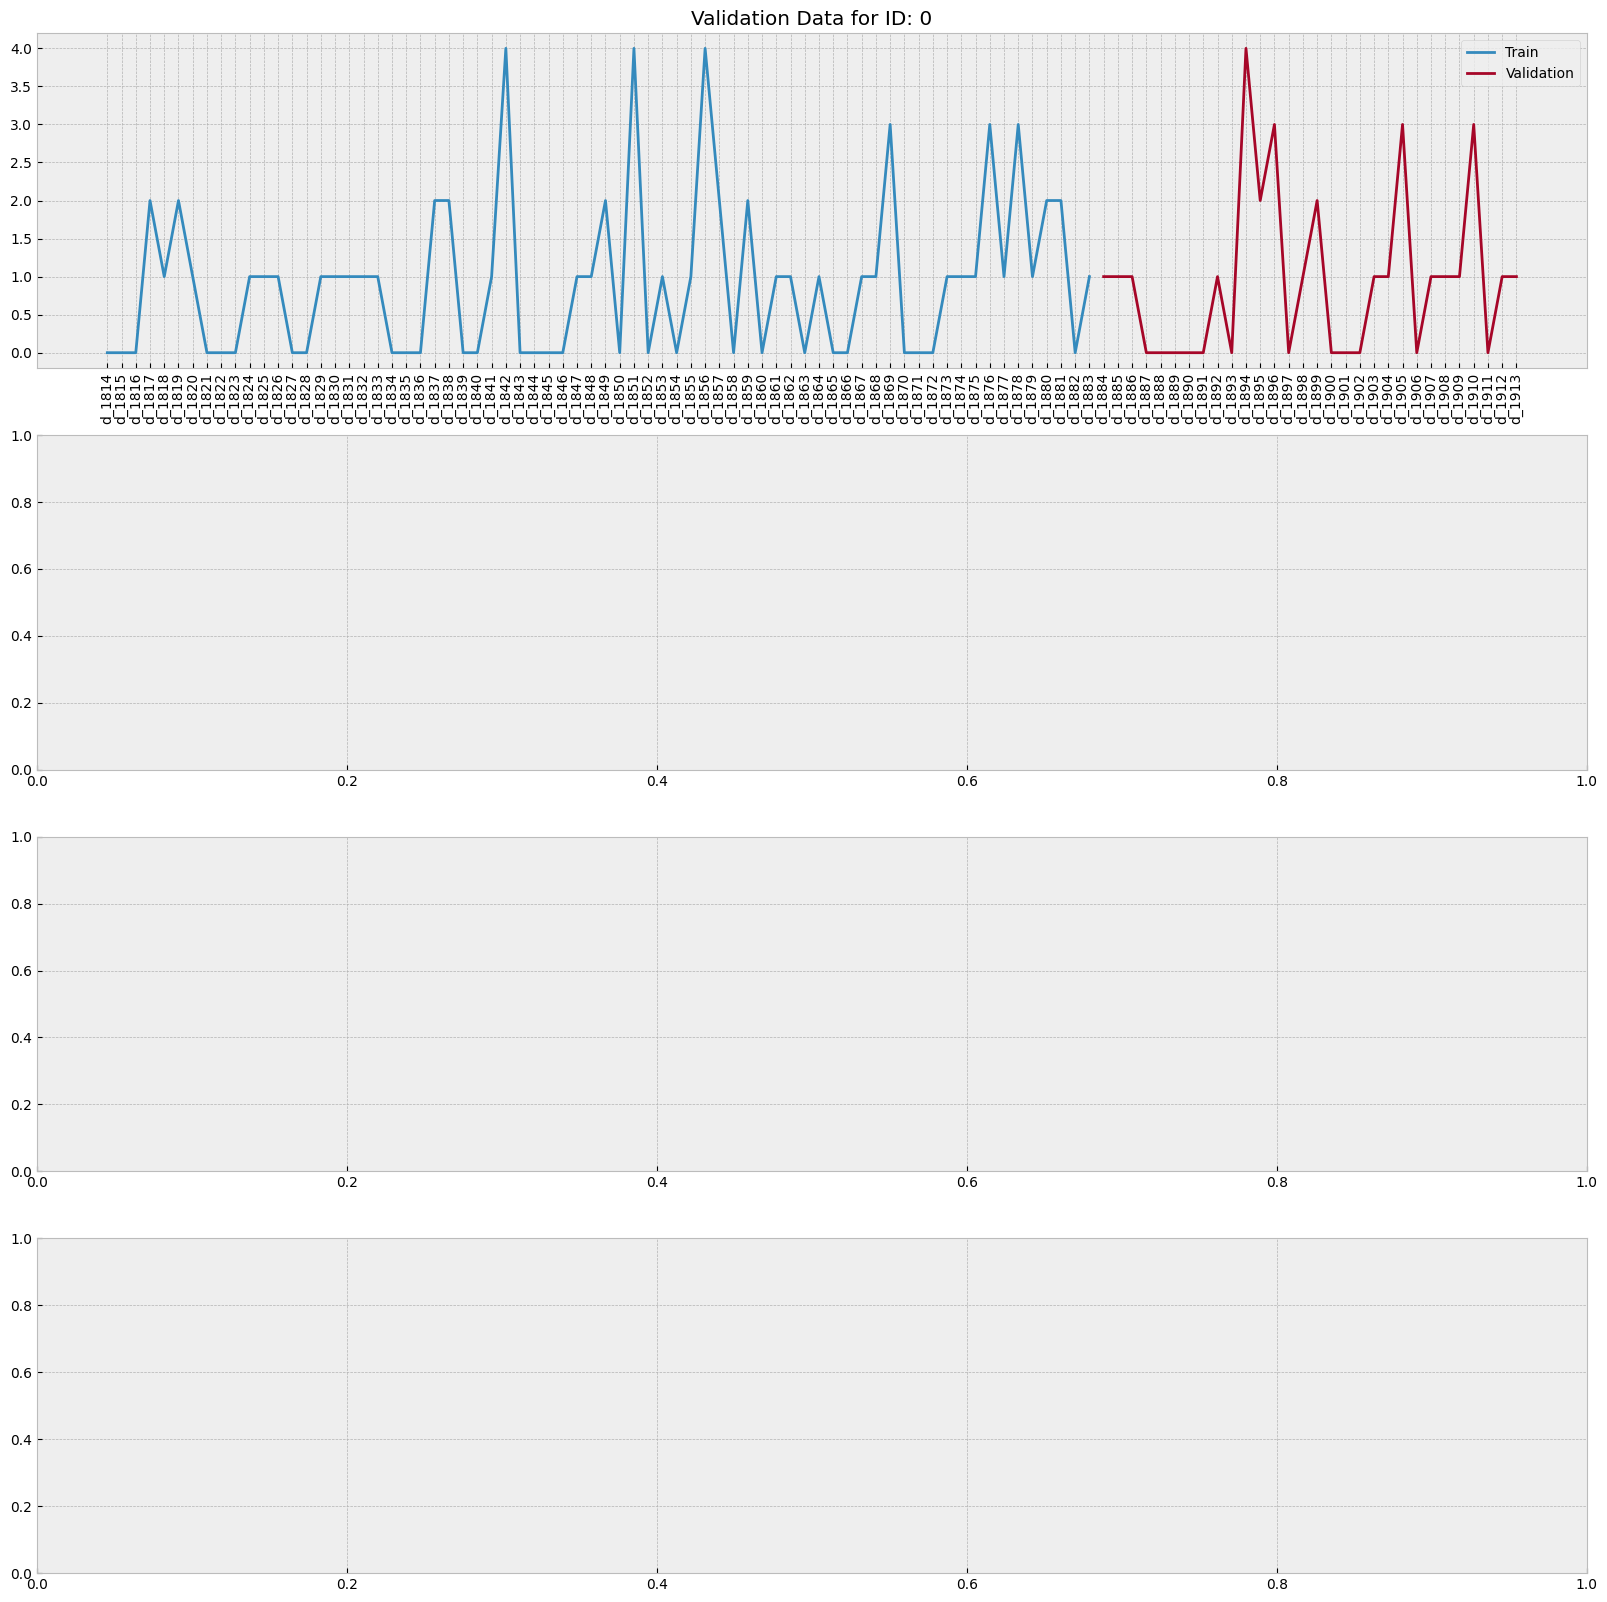

In [19]:
ids = [0, 2]
plot_graphs3(ids, [], [], False)

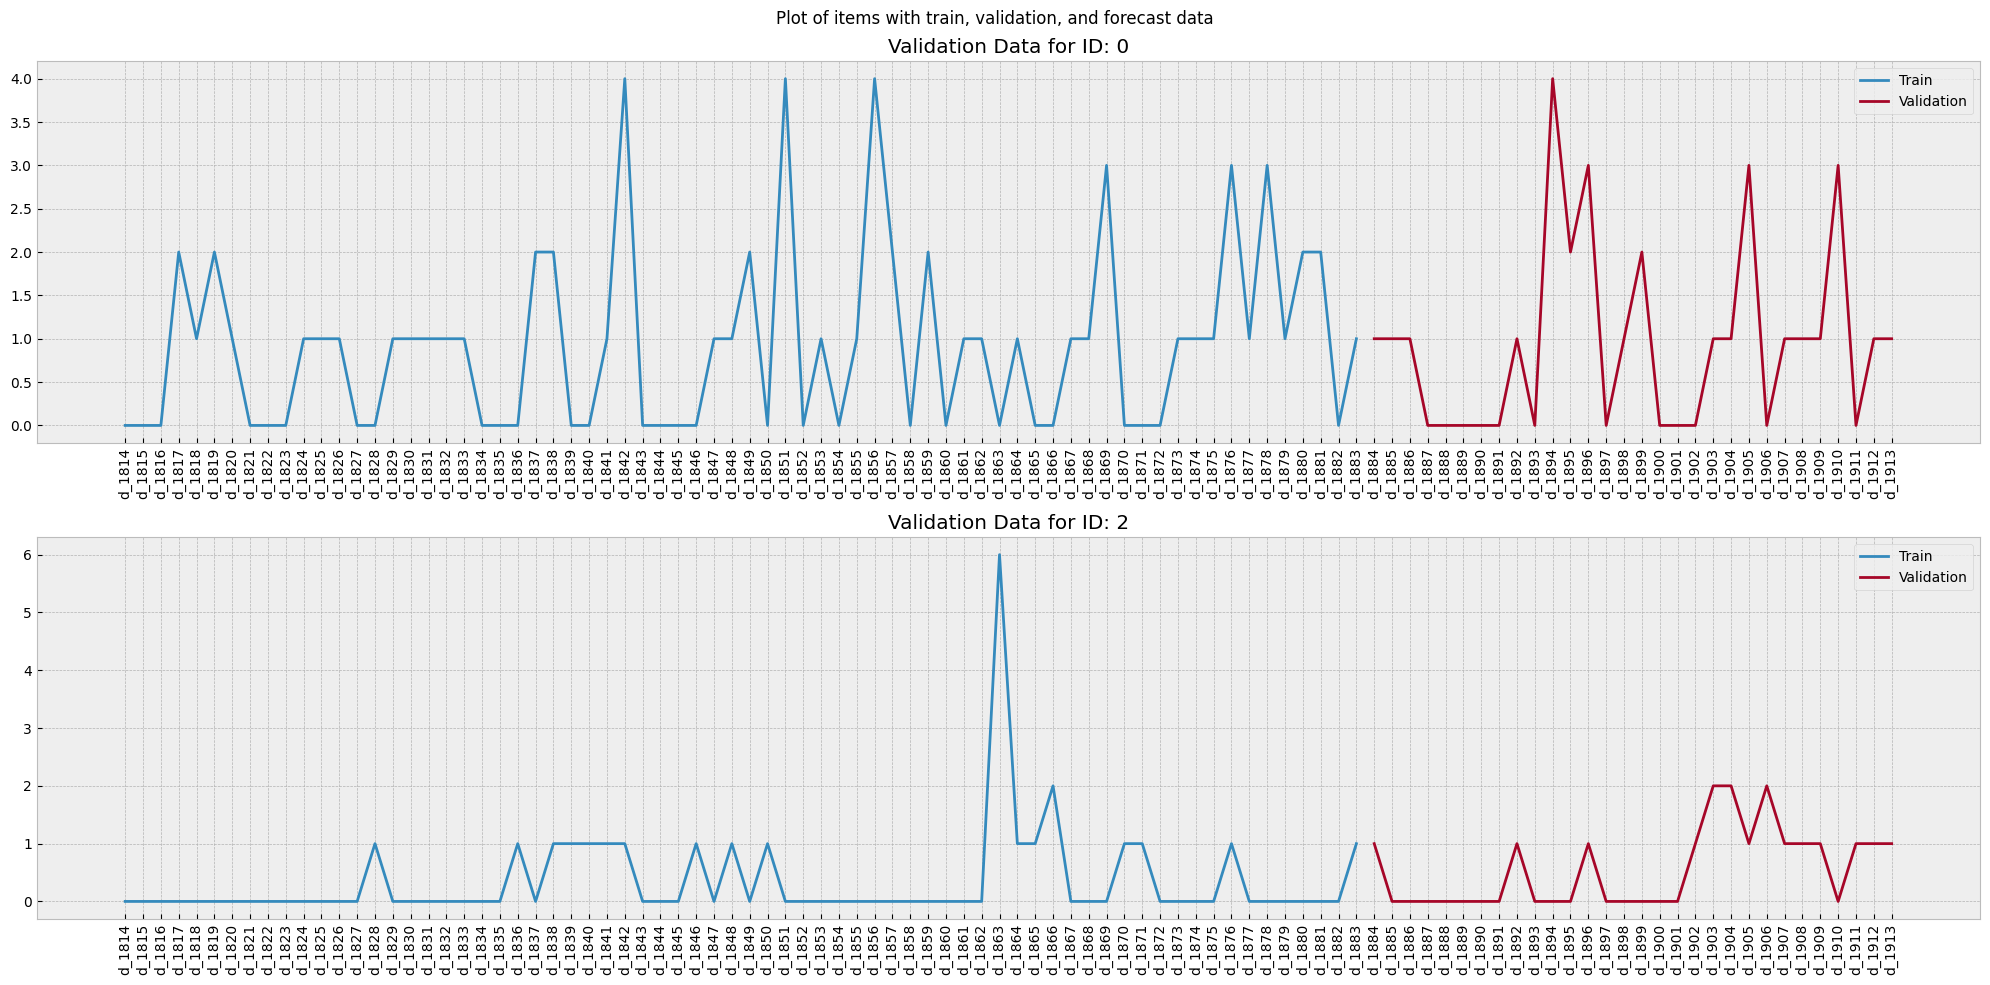

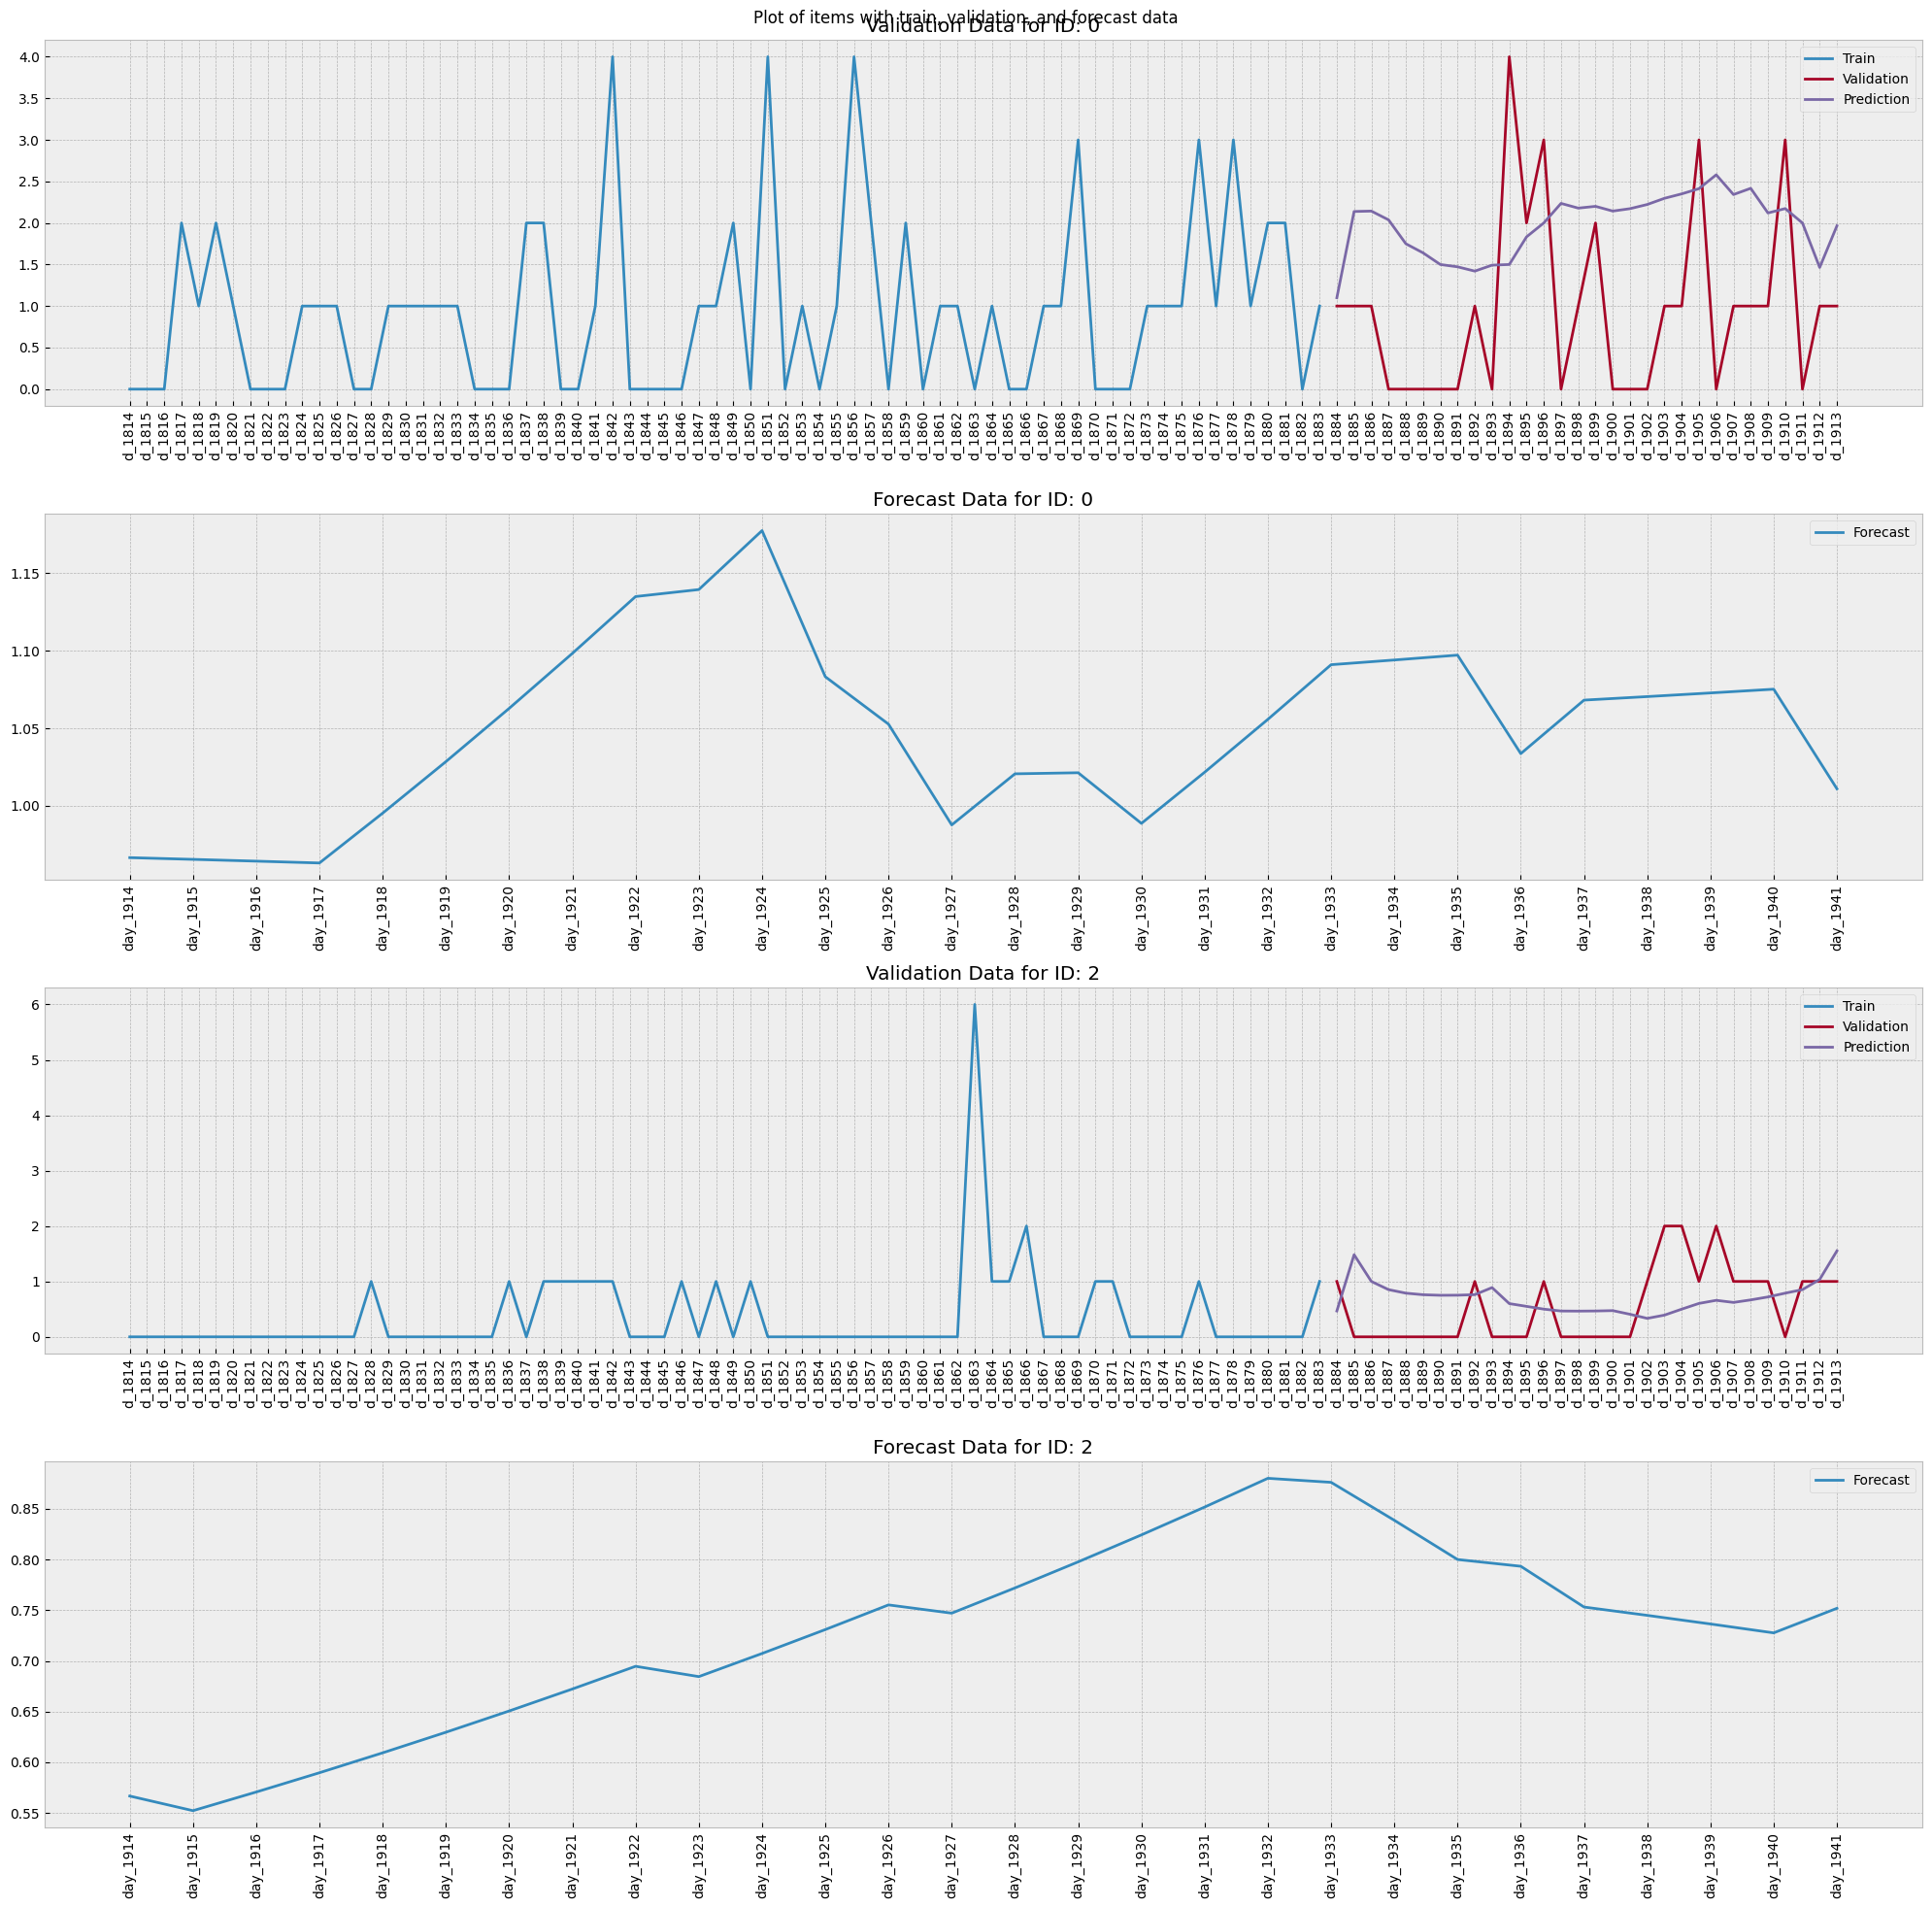

In [20]:
# Utility function to plot graph
def plot_graphs4(ids=[0, 2], pred=None, forecast_pred=None, pred_value=False):
    num_rows = len(ids)
    if pred_value:
        num_rows *= 2  # Double the rows if plotting predictions and forecasts
    
    fig, axs = plt.subplots(num_rows, 1, figsize=(20, 5 * num_rows))

    if len(ids) == 1:
        axs = [axs]  # Ensure axs is a list even for a single subplot

    for idx, i in enumerate(ids):
        # Plotting validation data
        axs[2*idx if pred_value else idx].plot(list(train_dataset.loc[i].keys()), train_dataset.loc[i].values, label='Train')
        axs[2*idx if pred_value else idx].plot(list(val_dataset.loc[i].keys()), val_dataset.loc[i].values, label='Validation')
        if pred_value and pred is not None:
            axs[2*idx].plot(list(val_dataset.loc[i].keys()), pred[i], label='Prediction')
        axs[2*idx if pred_value else idx].tick_params(axis='x', rotation=90)
        axs[2*idx if pred_value else idx].set_title(f'Validation Data for ID: {i}')
        axs[2*idx if pred_value else idx].legend()

        # Plotting forecast data
        if pred_value and forecast_pred is not None:
            future_dates = [f"day_{len(d_cols) + j + 1}" for j in range(forecast_pred.shape[1])]
            axs[2*idx + 1].plot(future_dates, forecast_pred[i], label='Forecast')
            axs[2*idx + 1].tick_params(axis='x', rotation=90)
            axs[2*idx + 1].set_title(f'Forecast Data for ID: {i}')
            axs[2*idx + 1].legend()

    plt.suptitle('Plot of items with train, validation, and forecast data')
    plt.tight_layout()
    plt.show()

# Example call for only training and validation data
ids = [0, 2]
plot_graphs4(ids)  # This will plot only training and validation data

# Example call with predictions and forecast data
plot_graphs4(ids, pred, forecast_pred, pred_value=True)  # This will plot train, validation, predictions, and forecast


In [22]:
error_moving

12.206935492097351

In [23]:
# Testing for stationarity using dickey fuller's test
from statsmodels.tsa.stattools import adfuller

In [24]:
def adfuller_test(val):
    result = adfuller(val)
    labels = ['ADF test statistics', 'p-value', '#Lags used', 'No of observations used']
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1] <= 0.05:
        print('Stationary')
    else:
        print('Non-stationary')

In [27]:
adfuller_test(train_dataset[train_dataset.columns[-30:]].values[2:3][0])

ADF test statistics:-2.3516987258045945
p-value:0.1558354966105514
#Lags used:2
No of observations used:27
Non-stationary


ADF test statistics:-1.2367414008368363
p-value:0.6575942439327376
#Lags used:9
No of observations used:13
Non-stationary


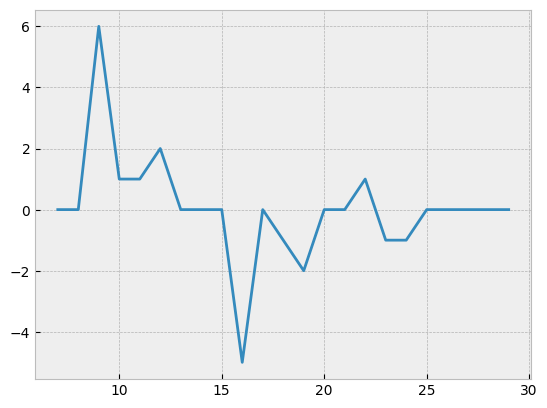

In [28]:
# Differencing to make it stationary
example = (train_dataset[train_dataset.columns[-30:]].loc[2]).reset_index()
example.columns = ['index', 'sales']

# Number by which the seasonality is present, if the seasonal cycle is 1 cycle in 12 months then, we pass 12 
example['seasonal first difference'] = example['sales'] - example['sales'].shift(7) #For us it is 7 
#print(example)
adfuller_test(example['seasonal first difference'].dropna())
example['seasonal first difference'].plot()
plt.show()

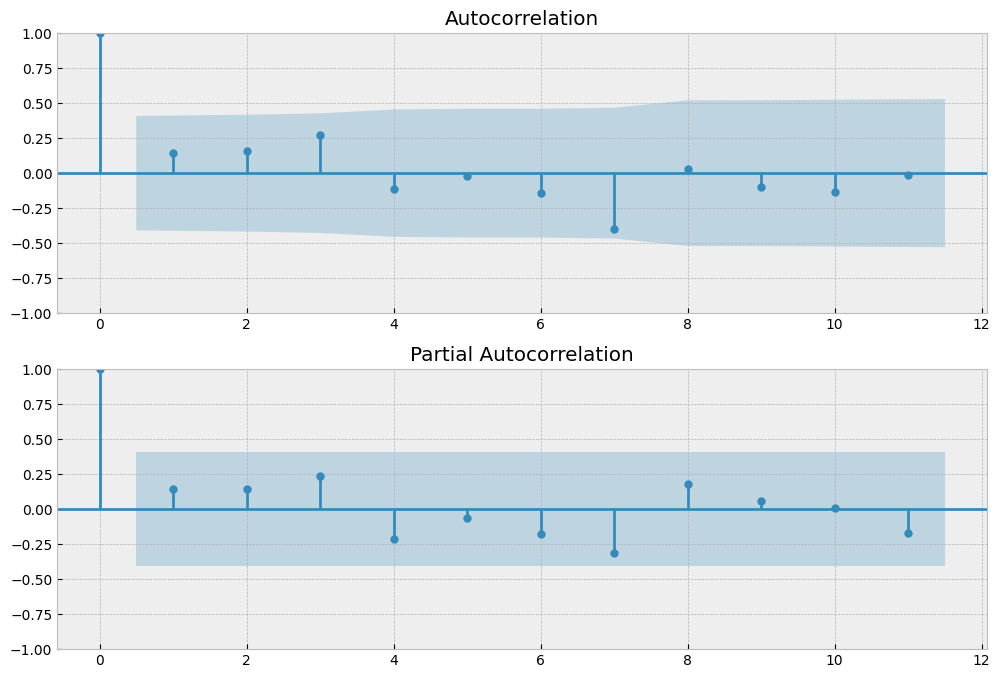

In [29]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(example['seasonal first difference'].dropna(),ax=ax1)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(example['seasonal first difference'].dropna(),ax=ax2)

In [30]:
def arima_forecast(train_dataset, val_dataset, window=30, forecast_days=28):
    # Predictions for the validation set
    predictions = []
    for i in range(len(val_dataset.columns)):
        row = train_dataset.iloc[i].values
        model = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit()
        forecast = model.get_forecast(steps=window).predicted_mean
        predictions.append(forecast)
    
    # Forecasting future values after validation period
    forecast_predictions = []
    last_window_data = val_dataset.values[:, -window:]
    for i in range(forecast_days):
        forecasts = []
        for row in last_window_data:
            model = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit()
            forecast = model.get_forecast(steps=1).predicted_mean
            forecasts.append(forecast[0])
        forecast_predictions.append(forecasts)
        last_window_data = np.hstack((last_window_data[:, 1:], np.array(forecasts)[:, np.newaxis]))
    
    predictions = np.array(predictions).T
    forecast_predictions = np.array(forecast_predictions).T

    # Calculate error for validation predictions
    error_norm = np.linalg.norm(predictions[:3] - val_dataset.values[:3] / len(predictions[0]))

    return predictions, forecast_predictions, float(error_norm)

In [31]:
pred, forecast_pred, error_arima = arima_forecast(train_dataset, val_dataset, window=30, forecast_days=28)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49826D+00    |proj g|=  2.10659D-01

At iterate    5    f=  1.46129D+00    |proj g|=  2.77621D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   3.392D-07   1.461D+00
  F =   1.4612835978243119     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.29428D-01    |proj g|=  9.36434D-02

At iterate   10    f=  5.24721D-01    |proj g|=  3.57244D-03

At iterate   15    f=  5.24644D-01    |proj g|=  2.45531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     18      1     0     0   3.067D-06   5.246D-01
  F =  0.52464426411246434     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29173D+00    |proj g|=  3.47305D-01


 This problem is unconstrained.



At iterate    5    f=  1.21913D+00    |proj g|=  2.52354D-02

At iterate   10    f=  1.21569D+00    |proj g|=  9.74695D-03

At iterate   15    f=  1.21515D+00    |proj g|=  1.64348D-03

At iterate   20    f=  1.21510D+00    |proj g|=  2.04596D-03

At iterate   25    f=  1.21509D+00    |proj g|=  1.02764D-03

At iterate   30    f=  1.21509D+00    |proj g|=  1.08233D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     49      1     0     0   1.104D-03   1.215D+00
  F =   1.2150920579684479     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   25    f=  1.85576D+00    |proj g|=  1.73345D-04

At iterate   30    f=  1.85576D+00    |proj g|=  7.43891D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     42      1     0     0   2.946D-05   1.856D+00
  F =   1.8557554845443256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61002D+00    |proj g|=  2.47144D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.53264D+00    |proj g|=  1.88793D-02

At iterate   10    f=  1.53169D+00    |proj g|=  3.87287D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   1.398D-06   1.532D+00
  F =   1.5316893022016118     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83549D+00    |proj g|=  1.32456D-01

At iterate    5    f=  1.80443D+00    |proj g|=  3.55131D-03

       

 This problem is unconstrained.



At iterate   15    f=  9.01403D-01    |proj g|=  1.80848D-03

At iterate   20    f=  9.01346D-01    |proj g|=  1.85480D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     35      1     0     0   1.279D-03   9.013D-01
  F =  0.90133951541627033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65785D+00    |proj g|=  3.79309D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.61420D+00    |proj g|=  1.26515D-01

At iterate   10    f=  3.60389D+00    |proj g|=  2.38776D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   2.991D-06   3.604D+00
  F =   3.6038838749973223     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38862D+00    |proj g|=  4.11938D-01

At iterate    5    f=  1.12726D+00    |proj g|=  5.16302D-03

       

 This problem is unconstrained.



At iterate   25    f=  1.26208D+00    |proj g|=  3.88481D-04

At iterate   30    f=  1.26208D+00    |proj g|=  2.57033D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     47      1     0     0   1.199D-04   1.262D+00
  F =   1.2620836015259063     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59454D-01    |proj g|=  5.76890D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  4.21492D-01    |proj g|=  1.13157D-01

At iterate   10    f=  4.17054D-01    |proj g|=  5.97103D-03

At iterate   15    f=  4.16921D-01    |proj g|=  2.96294D-04

At iterate   20    f=  4.16917D-01    |proj g|=  1.67297D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     43      1     0     0   6.757D-05   4.169D-01
  F =  0.41691686478240625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   15    f=  4.16048D-01    |proj g|=  2.59101D-03

At iterate   20    f=  4.15986D-01    |proj g|=  2.11364D-03

At iterate   25    f=  4.15985D-01    |proj g|=  2.19126D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     49      1     0     0   5.278D-03   4.160D-01
  F =  0.41598319564466274     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.78656D-01    |proj g|=  3.71955D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.85139D+00    |proj g|=  5.62104D-03

At iterate   10    f=  1.84905D+00    |proj g|=  1.07830D-03

At iterate   15    f=  1.84886D+00    |proj g|=  2.05299D-03

At iterate   20    f=  1.84884D+00    |proj g|=  3.80243D-04

At iterate   25    f=  1.84884D+00    |proj g|=  2.98173D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   5.927D-06   1.849D+00
  F =   1.8488409598775668     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.94737D+00    |proj g|=  6.16933D-03

At iterate   10    f=  2.94504D+00    |proj g|=  9.16337D-04

At iterate   15    f=  2.94485D+00    |proj g|=  3.31638D-04

At iterate   20    f=  2.94484D+00    |proj g|=  1.01857D-03

At iterate   25    f=  2.94484D+00    |proj g|=  3.61508D-05

At iterate   30    f=  2.94484D+00    |proj g|=  4.19038D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     36      1     0     0   4.190D-05   2.945D+00
  F =   2.9448360491521179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  1.64465D+00    |proj g|=  1.82520D-03

At iterate   20    f=  1.64461D+00    |proj g|=  4.28276D-04

At iterate   25    f=  1.64460D+00    |proj g|=  5.01013D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     37      1     0     0   5.010D-04   1.645D+00
  F =   1.6445993401324241     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.08782D-02    |proj g|=  4.42995D-01

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     25      1     0     0   5.142D-05  -3.382D-01
  F = -0.33824348876541255     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30735D+00    |proj g|=  1.49632D-01

At iterate    5    f=  3.25980D+00    |proj g|=  1.44767D-02

At iterate   10    f=  3.25159D+00    |proj g|=  7.71038D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.78250D-01    |proj g|=  4.35035D-04

At iterate   10    f=  8.78241D-01    |proj g|=  5.41726D-03

At iterate   15    f=  8.78035D-01    |proj g|=  8.33733D-03

At iterate   20    f=  8.77976D-01    |proj g|=  5.82638D-05

At iterate   25    f=  8.77972D-01    |proj g|=  2.09793D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     48      1     0     0   1.969D-04   8.780D-01
  F =  0.87797201179485951     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.06841D-01    |proj g|=  4.39845D-01

At iterate    5    f=  8.57019D-01    |proj g|=  7.44682D-02

At iterate   10    f=  8.38764D-01    |proj g|=  3.87273D-02

At iterate   15    f=  8.36797D-01    |proj g|=  6.73164D-03

At iterate   20    f=  8.36619D-01    |proj g|=  4.92689D-03

At iterate   25    f=  8.36598D-01    |proj g|=  3.16147D-03

At iterate   30    f=  8.36594D-01    |proj g|=  1.21732D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   25    f=  1.23383D+00    |proj g|=  1.99944D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     36      1     0     0   1.433D-04   1.234D+00
  F =   1.2338286867745623     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.66693D-01    |proj g|=  3.12401D-01

At iterate    5    f=  7.50449D-01    |proj g|=  1.43470D-02


 This problem is unconstrained.



At iterate   10    f=  7.46499D-01    |proj g|=  2.71334D-03

At iterate   15    f=  7.46285D-01    |proj g|=  5.08273D-03

At iterate   20    f=  7.46255D-01    |proj g|=  3.49621D-03

At iterate   25    f=  7.46252D-01    |proj g|=  1.13070D-03
  ys=-8.180E-07  -gs= 3.401E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     73      2     1     0   1.811D-05   7.463D-01
  F =  0.74625100798313182     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48876D+00    |proj g|=  2.92885D-01

At iterate    5    f=  1.39055D+00    |proj g|=  3.93093D-02

At iterate   10    f=  1.38509D+00    |proj g|=  4.83222D-03

At iterate   15    f=  1.38454D+00    |proj g|=  2.60621D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  4.45824D-01    |proj g|=  5.25098D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     32      1     0     0   5.251D-05   4.458D-01
  F =  0.44582371663921300     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04256D+00    |proj g|=  2.97984D-01

At iterate    5    f=  9.71513D-01    |proj g|=  1.46473D-02

At iterate   10    f=  9.66826D-01    |proj g|=  6.04467D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  9.66417D-01    |proj g|=  1.93234D-03

At iterate   25    f=  9.66414D-01    |proj g|=  4.27550D-04

At iterate   30    f=  9.66413D-01    |proj g|=  8.24380D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     50      1     0     0   4.224D-05   9.664D-01
  F =  0.96641263605475314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25040D+00    |proj g|=  3.46898D-01

At iter

 This problem is unconstrained.



At iterate   20    f=  1.16432D+00    |proj g|=  4.82725D-04

At iterate   25    f=  1.16431D+00    |proj g|=  1.12853D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     38      1     0     0   3.487D-04   1.164D+00
  F =   1.1643122764626737     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77832D+00    |proj g|=  1.58813D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.73216D+00    |proj g|=  4.24150D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     13      1     0     0   5.156D-06   1.732D+00
  F =   1.7320602961895908     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15741D+00    |proj g|=  1.70304D-01

At iterate    5    f=  3.07218D+00    |proj g|=  1.03503D-02

At iterate   10    f=  3.07012D+00    |proj g|=  3.06414D-04

At iter

 This problem is unconstrained.



At iterate   25    f=  1.32956D+00    |proj g|=  7.27150D-04
  ys=-1.767E-07  -gs= 7.431E-08 BFGS update SKIPPED

At iterate   30    f=  1.32956D+00    |proj g|=  1.93116D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     52      1     1     0   1.931D-04   1.330D+00
  F =   1.3295579778073732     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94288D-01    |proj g|=  8.01357D-01

At iterate    5  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.70897D-01    |proj g|=  5.15119D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   2.189D-05   2.709D-01
  F =  0.27089644113639871     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.82369D-01    |proj g|=  2.89152D-01

At iterate    5    f=  8.60387D-01    |proj g|=  1.27256D-02

At iterate   10    f=  8.58926D-01    |proj g|=  1.12827D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  1.71359D+00    |proj g|=  2.75516D-03

At iterate   20    f=  1.71353D+00    |proj g|=  3.87429D-04

At iterate   25    f=  1.71352D+00    |proj g|=  2.88684D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     45      1     0     0   2.422D-05   1.714D+00
  F =   1.7135186837651082     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56099D+00    |proj g|=  2.22641D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.45384D+00    |proj g|=  9.72988D-03

At iterate   10    f=  1.45256D+00    |proj g|=  3.55071D-03

At iterate   15    f=  1.45236D+00    |proj g|=  1.13348D-03

At iterate   20    f=  1.45233D+00    |proj g|=  4.38982D-04

At iterate   25    f=  1.45233D+00    |proj g|=  4.09823D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   1.862D-05   1.452D+00
  F =   1.4523265621987609     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.32332D+00    |proj g|=  1.75014D-03

At iterate   10    f=  1.32317D+00    |proj g|=  5.33706D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   9.687D-06   1.323D+00
  F =   1.3231655746589368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47586D-01    |proj g|=  3.17271D-01

At iterate    5    f=  8.35087D-01    |proj g|=  2.42664D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18081D+00    |proj g|=  2.63895D-01

At iterate    5    f=  1.03000D+00    |proj g|=  1.00929D-02

At iterate   10    f=  1.02595D+00    |proj g|=  5.11016D-03

At iterate   15    f=  1.02562D+00    |proj g|=  3.39246D-03

At iterate   20    f=  1.02557D+00    |proj g|=  1.70826D-03

At iterate   25    f=  1.02556D+00    |proj g|=  4.37144D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     40      1     0     0   4.362D-05   1.026D+00
  F =   1.0255627289857798     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51993D-01    |proj g|=  3.66668D-01

At iterate    5    f= -2.13951D-02    |proj g|=  6.95044D-02

At iterate   10    f= -2.97486D-02    |proj g|=  2.63404D-02

At iterate   15    f= -3.03074D-02    |proj g|=  8.79848D-03

At iter

 This problem is unconstrained.



At iterate   25    f= -3.04283D-02    |proj g|=  1.55102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     39      1     0     0   1.551D-03  -3.043D-02
  F =  -3.0428291073059870E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23465D-01    |proj g|=  3.76856D-01

At iterate    5    f=  5.77174D-01    |proj g|=  2.56051D-02

At iterate   10    f=  5.71207D-01    |proj g|=  2.91057D-02

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     43      1     0     0   1.099D-04   5.705D-01
  F =  0.57049595114976148     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15872D+00    |proj g|=  4.57319D-01

At iterate    5    f=  9.49447D-01    |proj g|=  3.54764D-02

At iterate   10    f=  9.45008D-01    |proj g|=  8.89512D-03

At iterate   15    f=  9.44489D-01    |proj g|=  1.69691D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  9.44412D-01    |proj g|=  1.19065D-04

At iterate   30    f=  9.44412D-01    |proj g|=  2.72977D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     51      1     0     0   4.350D-05   9.444D-01
  F =  0.94441177750401151     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63380D+00    |proj g|=  1.81115D-01

At iterate    5    f=  1.54530D+00    |proj g|=  7.44834D-03


 This problem is unconstrained.



At iterate   10    f=  1.54399D+00    |proj g|=  2.56708D-03

At iterate   15    f=  1.54374D+00    |proj g|=  2.58875D-03

At iterate   20    f=  1.54369D+00    |proj g|=  9.90658D-04

At iterate   25    f=  1.54368D+00    |proj g|=  3.04357D-04

At iterate   30    f=  1.54368D+00    |proj g|=  9.35730D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     43      1     0     0   9.349D-05   1.544D+00
  F =   1.5436806341807183     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.63872D+00    |proj g|=  8.24976D-04

At iterate   20    f=  2.63868D+00    |proj g|=  2.47598D-04

At iterate   25    f=  2.63867D+00    |proj g|=  1.45659D-04

At iterate   30    f=  2.63867D+00    |proj g|=  6.03173D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     39      1     0     0   9.651D-06   2.639D+00
  F =   2.6386715684418727     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  1.66042D+00    |proj g|=  3.40345D-03

At iterate   15    f=  1.66016D+00    |proj g|=  2.80287D-03

At iterate   20    f=  1.66013D+00    |proj g|=  7.83008D-04

At iterate   25    f=  1.66013D+00    |proj g|=  2.80212D-04

At iterate   30    f=  1.66013D+00    |proj g|=  1.49268D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     43      1     0     0   1.493D-04   1.660D+00
  F =   1.6601287227475920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     60      2     1     0   1.958D+04  -7.377D+00
  F =  -7.3769511620889698     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14110D+00    |proj g|=  3.48925D-01

At iterate    5    f=  3.03471D+00    |proj g|=  1.88668D-02

At iterate   10    f=  2.98272D+00    |proj g|=  1.43839D-02

At iterate   15    f=  2.98093D+00    |proj g|=  2.09100D-03

At iter


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   30    f=  2.98026D+00    |proj g|=  6.16728D-05

At iterate   35    f=  2.98026D+00    |proj g|=  4.17518D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     41      1     0     0   2.168D-06   2.980D+00
  F =   2.9802619349958146     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.61159D-01    |proj g|=  2.81561D-01

At iterate    5    f=  5.54964D-01    |proj g|=  1.92696D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  5.50001D-01    |proj g|=  2.85953D-03

At iterate   20    f=  5.49917D-01    |proj g|=  1.05349D-03

At iterate   25    f=  5.49902D-01    |proj g|=  2.97728D-03

At iterate   30    f=  5.49900D-01    |proj g|=  3.73265D-03

At iterate   35    f=  5.49900D-01    |proj g|=  1.04274D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     54      1     0     0   1.194D-05   5.499D-01
  F =  0.54989952342633908     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   25    f=  9.68158D-01    |proj g|=  1.89517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     43      1     0     0   5.566D-05   9.682D-01
  F =  0.96815777861854024     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.06880D-01    |proj g|=  7.81553D-02

At iterate    5    f=  8.94321D-01    |proj g|=  3.50355D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.33465D+00    |proj g|=  7.72422D-03

At iterate   10    f=  1.33123D+00    |proj g|=  1.02986D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     13      1     0     0   2.159D-06   1.331D+00
  F =   1.3312262648734658     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29941D-01    |proj g|=  6.77296D-02

At iterate    5    f=  5.22866D-01    |proj g|=  7.85348D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.08033D+00    |proj g|=  7.07992D-03

At iterate   10    f=  1.08000D+00    |proj g|=  2.36985D-03

At iterate   15    f=  1.07995D+00    |proj g|=  9.08944D-04

At iterate   20    f=  1.07995D+00    |proj g|=  1.53449D-04

At iterate   25    f=  1.07994D+00    |proj g|=  2.55562D-04

At iterate   30    f=  1.07994D+00    |proj g|=  8.38338D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     54      1     0     0   8.451D-05   1.080D+00
  F =   1.0799440305723698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.88367D-01    |proj g|=  3.20638D-03

At iterate   20    f=  8.88346D-01    |proj g|=  1.77203D-03

At iterate   25    f=  8.88341D-01    |proj g|=  3.50453D-04

At iterate   30    f=  8.88340D-01    |proj g|=  5.64661D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     43      1     0     0   5.647D-04   8.883D-01
  F =  0.88833989652749057     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.94523D-01    |proj g|=  9.07087D-03

At iterate   10    f=  8.94402D-01    |proj g|=  3.41435D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   3.414D-05   8.944D-01
  F =  0.89440223334525515     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78385D+00    |proj g|=  2.03600D-01

At iterate    5    f=  1.70010D+00    |proj g|=  6.20351D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  2.87650D+00    |proj g|=  3.15741D-03

At iterate   20    f=  2.87627D+00    |proj g|=  1.02216D-03

At iterate   25    f=  2.87625D+00    |proj g|=  2.00577D-04

At iterate   30    f=  2.87625D+00    |proj g|=  4.32717D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     36      1     0     0   4.327D-05   2.876D+00
  F =   2.8762527888443343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.00294D-01    |proj g|=  5.03494D-03

At iterate   15    f=  7.00081D-01    |proj g|=  7.01955D-03

At iterate   20    f=  7.00052D-01    |proj g|=  1.14031D-03

At iterate   25    f=  7.00048D-01    |proj g|=  2.50297D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     44      1     0     0   2.290D-05   7.000D-01
  F =  0.70004823009911976     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.08769D+00    |proj g|=  1.42609D-01

At iterate    5    f=  2.06335D+00    |proj g|=  1.25727D-02

At iterate   10    f=  2.06287D+00    |proj g|=  1.39084D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   1.391D-06   2.063D+00
  F =   2.0628698369215828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13722D+00    |proj g|=  2.06167D-01

At iterate    5    f=  1.08131D+00    |proj g|=  5.25548D-03

At iterate   10    f=  1.08109D+00    |proj g|=  1.66136D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   1.661D-06   1.081D+00
  F =   1.0810925731721179     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.67422D+00    |proj g|=  1.50261D-02

At iterate   10    f=  1.66881D+00    |proj g|=  4.94748D-03

At iterate   15    f=  1.66822D+00    |proj g|=  3.10782D-03

At iterate   20    f=  1.66816D+00    |proj g|=  4.65965D-04

At iterate   25    f=  1.66815D+00    |proj g|=  4.28216D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     36      1     0     0   4.282D-05   1.668D+00
  F =   1.6681538211778937     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   30    f=  1.02246D+00    |proj g|=  3.93553D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     55      1     0     0   1.176D-04   1.022D+00
  F =   1.0224633620655541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25680D+00    |proj g|=  1.22205D-01

At iterate    5    f=  1.17594D+00    |proj g|=  1.44265D-02

At iterate   10    f=  1.17392D+00    |proj g|=  3.78513D-03


 This problem is unconstrained.



At iterate   15    f=  1.17372D+00    |proj g|=  1.32410D-03

At iterate   20    f=  1.17371D+00    |proj g|=  2.82836D-04

At iterate   25    f=  1.17370D+00    |proj g|=  3.11358D-04

At iterate   30    f=  1.17370D+00    |proj g|=  3.72879D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     47      1     0     0   2.547D-04   1.174D+00
  F =   1.1737038538973665     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.34822D-01    |proj g|=  2.32542D-01

At iterate    5    f=  8.60228D-01    |proj g|=  1.20156D-02

At iterate   10    f=  8.60085D-01    |proj g|=  4.74431D-03

At iterate   15    f=  8.60060D-01    |proj g|=  5.26387D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   5.264D-06   8.601D-01
  F =  0.86006040603462308     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86219D+00    |proj g|=  9.52502D-02

At iterate    5    f=  1.84215D+00    |proj g|=  4.66985D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   8.121D-07   1.842D+00
  F =   1.8421445353275270     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.82445D-01    |proj g|=  1.49185D-02

At iterate   15    f=  8.82176D-01    |proj g|=  1.73392D-03

At iterate   20    f=  8.82141D-01    |proj g|=  1.65099D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     37      1     0     0   1.712D-04   8.821D-01
  F =  0.88213905235275969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15253D+00    |proj g|=  3.94360D-01


 This problem is unconstrained.



At iterate    5    f=  1.09529D+00    |proj g|=  3.39368D-02

At iterate   10    f=  1.09154D+00    |proj g|=  3.03210D-03

At iterate   15    f=  1.09140D+00    |proj g|=  1.46555D-03

At iterate   20    f=  1.09140D+00    |proj g|=  1.68272D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   1.222D-05   1.091D+00
  F =   1.0913980583410310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  1.90020D+00    |proj g|=  2.38136D-03

At iterate   15    f=  1.89936D+00    |proj g|=  1.66118D-03

At iterate   20    f=  1.89928D+00    |proj g|=  2.85126D-04

At iterate   25    f=  1.89927D+00    |proj g|=  6.41807D-05
  ys=-7.336E-09  -gs= 5.531E-08 BFGS update SKIPPED

At iterate   30    f=  1.89927D+00    |proj g|=  1.33527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     48      1     1     0   7.572D-05   1.899D+00
  F =   1.8992723141337973     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   25    f=  3.23282D+00    |proj g|=  1.12072D-04

At iterate   30    f=  3.23282D+00    |proj g|=  2.73343D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     37      1     0     0   9.256D-06   3.233D+00
  F =   3.2328175697850470     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13947D+00    |proj g|=  4.50668D-01

At iterate    5    f=  9.26919D-01    |proj g|=  1.34873D-02

At iter

 This problem is unconstrained.


At iterate   15    f=  9.22611D-01    |proj g|=  5.37053D-03

At iterate   20    f=  9.22551D-01    |proj g|=  7.28121D-04

At iterate   25    f=  9.22545D-01    |proj g|=  9.89024D-04

At iterate   30    f=  9.22544D-01    |proj g|=  1.68688D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     41      1     0     0   2.622D-06   9.225D-01
  F =  0.92254393695594250     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.



At iterate    5    f=  1.79478D+00    |proj g|=  1.57423D-02

At iterate   10    f=  1.78911D+00    |proj g|=  2.59809D-03

At iterate   15    f=  1.78861D+00    |proj g|=  2.82656D-03

At iterate   20    f=  1.78855D+00    |proj g|=  3.39606D-04

At iterate   25    f=  1.78854D+00    |proj g|=  6.41670D-05

At iterate   30    f=  1.78854D+00    |proj g|=  1.91046D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     39      1     0     0   2.943D-05   1.789D+00
  F =   1.7885391758723117     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  3.99831D-01    |proj g|=  7.82609D-02

At iterate   10    f=  3.91980D-01    |proj g|=  1.10081D-02

At iterate   15    f=  3.90875D-01    |proj g|=  6.45827D-03

At iterate   20    f=  3.90776D-01    |proj g|=  7.95042D-04
  ys=-2.414E-07  -gs= 2.406E-07 BFGS update SKIPPED

At iterate   25    f=  3.90775D-01    |proj g|=  1.00675D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     43      1     1     0   3.240D-05   3.908D-01
  F =  0.39077539486542145     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate    5    f=  5.95550D-01    |proj g|=  4.26365D-02

At iterate   10    f=  5.93014D-01    |proj g|=  6.30499D-03

At iterate   15    f=  5.92754D-01    |proj g|=  8.34264D-03

At iterate   20    f=  5.92723D-01    |proj g|=  3.71789D-03

At iterate   25    f=  5.92718D-01    |proj g|=  6.28362D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     43      1     0     0   8.098D-04   5.927D-01
  F =  0.59271810242542589     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.34609D+00    |proj g|=  2.11749D-02

At iterate   10    f=  1.34363D+00    |proj g|=  4.54946D-03

At iterate   15    f=  1.34328D+00    |proj g|=  6.90727D-04

At iterate   20    f=  1.34324D+00    |proj g|=  9.00579D-04

At iterate   25    f=  1.34323D+00    |proj g|=  4.12989D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     54      2     0     0   1.527D-05   1.343D+00
  F =   1.3432303440443978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17699D-01    |proj g|=  1.83336D-01

At iterate    5    f=  3.15975D-01    |proj g|=  1.08130D-01

At iterate   10    f=  3.11486D-01    |proj g|=  1.40984D-02

At iterate   15    f=  3.11135D-01    |proj g|=  5.36547D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.61851D+00    |proj g|=  3.20258D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   4.490D-06   1.619D+00
  F =   1.6185110595187144     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71328D+00    |proj g|=  3.15675D-01

At iterate    5    f=  1.55184D+00    |proj g|=  1.52332D-02

At iterate   10    f=  1.54709D+00    |proj g|=  3.39916D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.47058D-01    |proj g|=  3.35672D-03

At iterate   15    f=  9.47025D-01    |proj g|=  8.36715D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   8.367D-05   9.470D-01
  F =  0.94702460488072449     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08532D+00    |proj g|=  1.94158D-01

At iterate    5    f=  1.02293D+00    |proj g|=  9.33666D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.67968D-01    |proj g|=  1.64079D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   6.740D-06   9.680D-01
  F =  0.96796378432343899     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12216D-01    |proj g|=  3.66929D-01

At iterate    5    f=  1.10285D-01    |proj g|=  6.06068D-02

At iterate   10    f=  1.05340D-01    |proj g|=  5.36153D-02

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     35      1     0     0   6.422D-04   6.737D-01
  F =  0.67366658676395563     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25558D-01    |proj g|=  3.62834D-01

At iterate    5    f=  4.84396D-01    |proj g|=  7.49941D-02


 This problem is unconstrained.



At iterate   10    f=  4.77355D-01    |proj g|=  1.34403D-02

At iterate   15    f=  4.76726D-01    |proj g|=  1.26181D-02

At iterate   20    f=  4.76666D-01    |proj g|=  7.74286D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     40      1     0     0   3.354D-03   4.767D-01
  F =  0.47666056802503970     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67509D+00    |proj g|=  2.41781D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.58416D+00    |proj g|=  6.81787D-03

At iterate   10    f=  1.58260D+00    |proj g|=  3.25081D-03

At iterate   15    f=  1.58242D+00    |proj g|=  1.59839D-03

At iterate   20    f=  1.58240D+00    |proj g|=  1.46115D-03

At iterate   25    f=  1.58239D+00    |proj g|=  6.08591D-05

At iterate   30    f=  1.58239D+00    |proj g|=  1.12796D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     42      1     0     0   1.131D-04   1.582D+00
  F =   1.5823942110157794     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   25    f=  3.61417D-01    |proj g|=  1.60649D-03

At iterate   30    f=  3.61416D-01    |proj g|=  2.49294D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     63      2     0     0   5.100D-06   3.614D-01
  F =  0.36141617603855231     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27144D+00    |proj g|=  2.56893D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   5.316D-07   1.271D+00
  F =   1.2707039815369829     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.23133D+00    |proj g|=  1.92853D-01

At iterate    5    f=  2.15101D+00    |proj g|=  6.43625D-03

At iterate   10    f=  2.14899D+00    |proj g|=  1.71738D-03

At iterate   15    f=  2.14879D+00    |proj g|=  5.94074D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.46374D-01    |proj g|=  1.08369D-02

At iterate   15    f=  6.45864D-01    |proj g|=  4.19167D-03

At iterate   20    f=  6.45805D-01    |proj g|=  2.67906D-03

At iterate   25    f=  6.45798D-01    |proj g|=  5.60888D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     46      1     0     0   5.462D-05   6.458D-01
  F =  0.64579806974663034     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07081D+00    |proj g|=  1.04765D-01

At iterate    5    f=  1.05548D+00    |proj g|=  2.16948D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   6.891D-06   1.055D+00
  F =   1.0554786184128573     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  9.71859D-01    |proj g|=  2.72061D-04

At iterate   25    f=  9.71857D-01    |proj g|=  4.26469D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     45      1     0     0   9.350D-05   9.719D-01
  F =  0.97185704171338216     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36216D+00    |proj g|=  1.73574D-01

At iterate    5    f=  1.28052D+00    |proj g|=  4.04930D-03


 This problem is unconstrained.



At iterate   10    f=  1.27921D+00    |proj g|=  1.77355D-03

At iterate   15    f=  1.27907D+00    |proj g|=  2.08621D-03

At iterate   20    f=  1.27905D+00    |proj g|=  1.02679D-03

At iterate   25    f=  1.27905D+00    |proj g|=  4.21578D-04

At iterate   30    f=  1.27905D+00    |proj g|=  2.78720D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     42      1     0     0   2.862D-05   1.279D+00
  F =   1.2790489432210468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     49      1     0     0   1.422D-04   9.549D-01
  F =  0.95493866773675762     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32515D+00    |proj g|=  2.17424D-01

At iterate    5    f=  1.21177D+00    |proj g|=  7.87355D-03

At iterate   10    f=  1.20953D+00    |proj g|=  1.00484D-02

At iterate   15    f=  1.20920D+00    |proj g|=  2.17119D-03

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     40      1     0     0   2.032D-04   1.209D+00
  F =   1.2091657880812758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34438D+00    |proj g|=  3.73844D-01

At iterate    5    f=  1.17654D+00    |proj g|=  2.58746D-02

At iterate   10    f=  1.17381D+00    |proj g|=  5.56459D-03

At iterate   15    f=  1.17349D+00    |proj g|=  3.58822D-03

At iter

 This problem is unconstrained.



At iterate   30    f=  1.17345D+00    |proj g|=  2.00763D-04

At iterate   35    f=  1.17345D+00    |proj g|=  4.22986D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  1.17345D+00    |proj g|=  1.77729D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     75      2     0     0   1.777D-06   1.173D+00
  F =   1.1734460971457268     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88001D+00    |proj g|=  3.33824D-01

At iterate    5    f=  1.72589D+00    |proj g|=  1.53750D-02

At iterate   10    f=  1.72103D+00    |proj g|=  2.03467D-03

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     38      1     0     0   3.712D-04   1.007D+00
  F =   1.0065161303970540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90634D+00    |proj g|=  1.12220D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  1.03937D+00    |proj g|=  2.64002D-04

At iterate   25    f=  1.03937D+00    |proj g|=  1.17934D-03

At iterate   30    f=  1.03937D+00    |proj g|=  2.57203D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     50      1     0     0   2.572D-04   1.039D+00
  F =   1.0393667839384022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.13713D-01    |proj g|=  1.56511D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   3.588D-06  -1.141D-01
  F = -0.11408657354344379     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18850D+00    |proj g|=  1.96356D-01

At iterate    5    f=  1.12040D+00    |proj g|=  3.51405D-03

At iterate   10    f=  1.12008D+00    |proj g|=  1.97513D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   25    f=  1.45987D+00    |proj g|=  1.06293D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   4.571D-06   1.460D+00
  F =   1.4598730059715144     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57291D+00    |proj g|=  4.07572D-01

At iterate    5    f=  1.40449D+00    |proj g|=  1.50116D-02

At iterate   10    f=  1.39994D+00    |proj g|=  3.49549D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  1.39943D+00    |proj g|=  1.70739D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     40      1     0     0   1.712D-04   1.399D+00
  F =   1.3994308135354674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43840D-01    |proj g|=  7.63301D-02

At iterate    5    f=  4.42987D-01    |proj g|=  1.92668D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41540D+00    |proj g|=  4.34573D-01

At iterate    5    f=  1.21010D+00    |proj g|=  1.55024D-02

At iterate   10    f=  1.20762D+00    |proj g|=  4.55328D-03

At iterate   15    f=  1.20730D+00    |proj g|=  2.70613D-03

At iterate   20    f=  1.20727D+00    |proj g|=  4.20752D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   25    f=  1.20727D+00    |proj g|=  1.78433D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     50      2     0     0   4.990D-07   1.207D+00
  F =   1.2072657799233617     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65082D+00    |proj g|=  3.04144D-01

At iterate    5    f=  1.50182D+00    |proj g|=  1.68438D-02

At iterate   10    f=  1.49745D+00    |proj g|=  3.05215D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.95433D+00    |proj g|=  7.31995D-04

At iterate   20    f=  1.95433D+00    |proj g|=  4.59938D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     23      1     0     0   7.609D-06   1.954D+00
  F =   1.9543294879546287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51993D-01    |proj g|=  1.10633D-01

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.13713D-01    |proj g|=  1.56511D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   3.588D-06  -1.141D-01
  F = -0.11408657354348321     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.6

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     60      2     1     0   1.958D+04  -7.377D+00
  F =  -7.3769511620889698     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.24658D-01    |proj g|=  2.18255D-01

At iterate    5    f=  5.06663D-01    |proj g|=  5.82237D-02

At iterate   10    f=  5.04329D-01    |proj g|=  9.75042D-03

At iterate   15    f=  5.04122D-01    |proj g|=  6.18872D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  1.01256D+00    |proj g|=  4.54281D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     43      1     0     0   4.740D-05   1.013D+00
  F =   1.0125566277891340     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21235D+00    |proj g|=  1.14971D-01

At iterate    5    f=  1.18930D+00    |proj g|=  1.08031D-02

At iterate   10    f=  1.18896D+00    |proj g|=  9.48797D-08

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22646D+00    |proj g|=  2.55822D-01

At iterate    5    f=  1.15666D+00    |proj g|=  1.21552D-02

At iterate   10    f=  1.15585D+00    |proj g|=  8.57825D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   7.812D-06   1.156D+00
  F =   1.1558459664808070     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10634D+00    |proj g|=  2.06122D-01

At iterate    5    f=  2.04707D+00    |proj g|=  1.84878D-03

At iterate   10    f=  2.04703D+00    |proj g|=  9.68736D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     11      1     0     0   9.687D-07   2.047D+00
  F =   2.0470268195251213     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.91800D-01    |proj g|=  1.12945D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     25      1     0     0   1.437D-05   4.918D-01
  F =  0.49180005194600790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09657D+00    |proj g|=  4.36161D-01

At iterate    5    f=  8.79256D-01    |proj g|=  3.69840D-02

At iterate   10    f=  8.75248D-01    |proj g|=  2.80934D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f=  1.23641D+00    |proj g|=  9.08975D-03

At iterate   10    f=  1.23326D+00    |proj g|=  5.18367D-03

At iterate   15    f=  1.23294D+00    |proj g|=  1.99250D-03

At iterate   20    f=  1.23291D+00    |proj g|=  7.12794D-04

At iterate   25    f=  1.23290D+00    |proj g|=  4.07425D-04

At iterate   30    f=  1.23290D+00    |proj g|=  5.96582D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     40      1     0     0   5.728D-05   1.233D+00
  F =   1.2329003588659475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   25    f=  6.30559D-01    |proj g|=  4.77077D-04

At iterate   30    f=  6.30558D-01    |proj g|=  4.70674D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     40      1     0     0   4.707D-04   6.306D-01
  F =  0.63055821058234462     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44256D+00    |proj g|=  1.80120D-01

At iterate    5    f=  1.37998D+00    |proj g|=  3.29774D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  1.37883D+00    |proj g|=  1.02086D-03

At iterate   25    f=  1.37882D+00    |proj g|=  6.80557D-04

At iterate   30    f=  1.37882D+00    |proj g|=  6.44827D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     44      1     0     0   2.402D-04   1.379D+00
  F =   1.3788163488337923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06958D+00    |proj g|=  1.28502D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.03484D+00    |proj g|=  4.95127D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   3.268D-06   1.035D+00
  F =   1.0348370310850266     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.93154D-01    |proj g|=  3.31056D-01

At iterate    5    f=  6.45659D-01    |proj g|=  2.65815D-02

At iterate   10    f=  6.44142D-01    |proj g|=  1.42081D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.82605D-01    |proj g|=  4.11215D-03

At iterate   20    f=  5.82581D-01    |proj g|=  3.26618D-03

At iterate   25    f=  5.82573D-01    |proj g|=  2.29399D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     57      1     0     0   4.471D-05   5.826D-01
  F =  0.58257290085507352     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94035D-01    |proj g|=  8.07785D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.07421D-01    |proj g|=  2.44446D-01

At iterate    5    f=  2.20804D-01    |proj g|=  8.22004D-02

At iterate   10    f=  2.20095D-01    |proj g|=  1.84527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   1.336D-04   2.201D-01
  F =  0.22009497485063637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.14408D+00    |proj g|=  1.30103D-03

At iterate   20    f=  1.14408D+00    |proj g|=  2.12036D-04

At iterate   25    f=  1.14408D+00    |proj g|=  5.54243D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     43      1     0     0   5.570D-05   1.144D+00
  F =   1.1440793494290016     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32578D+00    |proj g|=  2.92159D-01


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.23662D+00    |proj g|=  2.73638D-03

At iterate   10    f=  1.23628D+00    |proj g|=  1.53944D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   9.384D-06   1.236D+00
  F =   1.2362806446473413     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96310D-01    |proj g|=  2.55734D+00

At iterate    5    f=  6.31846D-01    |proj g|=  2.56527D-04

       

 This problem is unconstrained.



At iterate   30    f=  1.80515D+00    |proj g|=  1.18784D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     50      1     0     0   5.135D-05   1.805D+00
  F =   1.8051479460443745     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18929D+00    |proj g|=  3.57519D-01

At iterate    5    f=  1.04906D+00    |proj g|=  8.14600D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.04765D+00    |proj g|=  5.82016D-03

At iterate   15    f=  1.04732D+00    |proj g|=  1.23359D-03

At iterate   20    f=  1.04727D+00    |proj g|=  4.09862D-03

At iterate   25    f=  1.04726D+00    |proj g|=  1.36182D-04

At iterate   30    f=  1.04726D+00    |proj g|=  3.41708D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     42      1     0     0   3.548D-04   1.047D+00
  F =   1.0472569017731390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  2.34720D+00    |proj g|=  2.00209D-04

At iterate   30    f=  2.34720D+00    |proj g|=  3.02368D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     35      1     0     0   5.007D-06   2.347D+00
  F =   2.3471956408230272     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49161D+00    |proj g|=  1.15287D-01

At iterate    5    f=  1.40096D+00    |proj g|=  3.21171D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  1.39942D+00    |proj g|=  3.36224D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     43      1     0     0   3.311D-05   1.399D+00
  F =   1.3994170385862899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66794D+00    |proj g|=  2.64112D-01

At iterate    5    f=  1.56764D+00    |proj g|=  2.26056D-03

At iterate   10    f=  1.56757D+00    |proj g|=  1.96077D-05

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.18835D+00    |proj g|=  5.19446D-03

At iterate   10    f=  1.18669D+00    |proj g|=  2.79729D-03

At iterate   15    f=  1.18645D+00    |proj g|=  1.89332D-03

At iterate   20    f=  1.18642D+00    |proj g|=  3.20264D-04

At iterate   25    f=  1.18642D+00    |proj g|=  1.35884D-03

At iterate   30    f=  1.18642D+00    |proj g|=  3.35428D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     50      1     0     0   3.307D-05   1.186D+00
  F =   1.1864153549242655     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  1.51917D+00    |proj g|=  1.76637D-02

At iterate   10    f=  1.51889D+00    |proj g|=  3.46712D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   9.869D-06   1.519D+00
  F =   1.5188883001479638     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.15611D-01    |proj g|=  3.85616D-01

At iterate    5    f=  7.77502D-01    |proj g|=  6.04081D-02

At itera

 This problem is unconstrained.



At iterate   20    f=  7.68764D-01    |proj g|=  3.26523D-03

At iterate   25    f=  7.68756D-01    |proj g|=  1.52036D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     42      1     0     0   2.310D-04   7.688D-01
  F =  0.76875548236318414     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44268D+00    |proj g|=  2.97349D-01

At iterate    5    f=  1.32263D+00    |proj g|=  1.11706D-02


 This problem is unconstrained.



At iterate   10    f=  1.32002D+00    |proj g|=  4.89853D-03

At iterate   15    f=  1.31943D+00    |proj g|=  1.05298D-03

At iterate   20    f=  1.31937D+00    |proj g|=  1.69397D-03

At iterate   25    f=  1.31936D+00    |proj g|=  5.53337D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   5.204D-06   1.319D+00
  F =   1.3193626000632723     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  1.58965D+00    |proj g|=  8.58283D-03

At iterate   15    f=  1.58904D+00    |proj g|=  7.01570D-03

At iterate   20    f=  1.58894D+00    |proj g|=  3.21962D-04

At iterate   25    f=  1.58893D+00    |proj g|=  5.82916D-04

At iterate   30    f=  1.58893D+00    |proj g|=  9.98163D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     36      1     0     0   8.349D-06   1.589D+00
  F =   1.5889255552606041     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.31694D+00    |proj g|=  9.44196D-03

At iterate   10    f=  1.31568D+00    |proj g|=  3.27312D-03

At iterate   15    f=  1.31556D+00    |proj g|=  3.26518D-03

At iterate   20    f=  1.31554D+00    |proj g|=  2.75350D-05

At iterate   25    f=  1.31554D+00    |proj g|=  1.58587D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     43      1     0     0   5.909D-05   1.316D+00
  F =   1.3155409326709437     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.35855D+00    |proj g|=  1.84755D-02

At iterate   10    f=  2.35649D+00    |proj g|=  2.02198D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   7.797D-06   2.356D+00
  F =   2.3564897741096886     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.16555D-01    |proj g|=  2.48811D-01

At iterate    5    f=  8.40099D-01    |proj g|=  4.91143D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.07421D-01    |proj g|=  2.44447D-01

At iterate    5    f=  2.06975D-01    |proj g|=  2.19497D-01

At iterate   10    f=  2.00849D-01    |proj g|=  1.17198D-02

At iterate   15    f=  2.00239D-01    |proj g|=  1.39045D-02

At iterate   20    f=  2.00179D-01    |proj g|=  1.16946D-02

At iterate   25    f=  2.00172D-01    |proj g|=  6.29310D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   30    f=  2.00169D-01    |proj g|=  1.45635D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     59      2     0     0   1.369D-04   2.002D-01
  F =  0.20016856424511384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39088D+00    |proj g|=  4.73511D-01

At iterate    5    f=  1.20427D+00    |proj g|=  1.94752D-02

At iterate   10    f=  1.20091D+00    |proj g|=  6.98626D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.55681D+00    |proj g|=  1.07237D-02

At iterate   10    f=  1.55390D+00    |proj g|=  2.76234D-03

At iterate   15    f=  1.55365D+00    |proj g|=  1.97625D-04

At iterate   20    f=  1.55363D+00    |proj g|=  5.89079D-04

At iterate   25    f=  1.55363D+00    |proj g|=  4.52268D-04
  ys=-5.134E-07  -gs= 2.408E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     39      1     1     0   8.010D-05   1.554D+00
  F =   1.5536249740545252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   30    f=  1.51317D+00    |proj g|=  3.45267D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     43      1     0     0   3.453D-05   1.513D+00
  F =   1.5131717429904648     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42898D+00    |proj g|=  2.97168D-01

At iterate    5    f=  1.32313D+00    |proj g|=  2.36869D-03

At iterate   10    f=  1.32295D+00    |proj g|=  1.08815D-04

       

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   5.943D-05   2.152D-01
  F =  0.21517208595406659     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44330D+00    |proj g|=  3.44954D-01

At iterate    5    f=  1.29524D+00    |proj g|=  2.05512D-02

At iterate   10    f=  1.29377D+00    |proj g|=  3.96577D-03

At iterate   15    f=  1.29353D+00    |proj g|=  1.92457D-03

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     33      1     0     0   8.128D-06   1.293D+00
  F =   1.2934948544554650     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11652D+00    |proj g|=  1.83674D-01

At iterate    5    f=  2.07720D+00    |proj g|=  9.49826D-03

At iterate   10    f=  2.07712D+00    |proj g|=  9.33325D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   3.520D-06   1.278D+00
  F =   1.2778216796277146     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25737D+00    |proj g|=  5.49170D-02

At iterate    5    f=  2.24631D+00    |proj g|=  5.85390D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   4.261D-06   1.460D+00
  F =   1.4595837144924699     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.65013D+00    |proj g|=  2.14796D+05
  ys=-2.019E+00  -gs= 6.257E-01 BFGS update SKIPPED


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     60      2     1     0   1.958D+04  -7.377D+00
  F =  -7.3769511620889698     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78409D+00    |proj g|=  3.39034D-01

At iterate    5    f=  1.62281D+00    |proj g|=  1.37429D-02

At iterate   10    f=  1.61834D+00    |proj g|=  2.19424D-03

At iterate   15    f=  1.61792D+00    |proj g|=  4.51944D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.12106D+00    |proj g|=  2.80279D-03

At iterate   20    f=  1.12104D+00    |proj g|=  2.91326D-04

At iterate   25    f=  1.12104D+00    |proj g|=  7.06535D-04

At iterate   30    f=  1.12104D+00    |proj g|=  3.83487D-04

At iterate   35    f=  1.12104D+00    |proj g|=  2.46224D-04
  ys=-2.897E-09  -gs= 2.579E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     60      1     1     0   8.517D-05   1.121D+00
  F =   1.1210383192571891     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   25    f=  1.56895D+00    |proj g|=  2.86682D-04

At iterate   30    f=  1.56895D+00    |proj g|=  1.92411D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     44      1     0     0   5.396D-05   1.569D+00
  F =   1.5689531605538174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55931D+00    |proj g|=  2.51371D-01

At iterate    5    f=  1.49899D+00    |proj g|=  2.01208D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.49776D+00    |proj g|=  1.04003D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     17      1     0     0   5.826D-06   1.498D+00
  F =   1.4977594647511048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64116D+00    |proj g|=  1.96319D-01

At iterate    5    f=  1.56612D+00    |proj g|=  1.51035D-03

At iterate   10    f=  1.56600D+00    |proj g|=  5.05964D-04

       

 This problem is unconstrained.



At iterate   10    f=  1.76430D+00    |proj g|=  5.18915D-03

At iterate   15    f=  1.76379D+00    |proj g|=  2.57767D-03

At iterate   20    f=  1.76374D+00    |proj g|=  5.17374D-04

At iterate   25    f=  1.76374D+00    |proj g|=  2.61412D-04

At iterate   30    f=  1.76374D+00    |proj g|=  1.97930D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     42      1     0     0   1.979D-05   1.764D+00
  F =   1.7637362310960032     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  1.73329D+00    |proj g|=  7.75199D-04

At iterate   25    f=  1.73329D+00    |proj g|=  2.11858D-04

At iterate   30    f=  1.73329D+00    |proj g|=  1.17843D-04

At iterate   35    f=  1.73329D+00    |proj g|=  1.56717D-04

At iterate   40    f=  1.73329D+00    |proj g|=  3.52170D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     54      1     0     0   3.522D-05   1.733D+00
  F =   1.7332874183076876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     38      1     0     0   6.726D-05   1.797D+00
  F =   1.7965742600239787     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.74312D-01    |proj g|=  8.48766D-02

At iterate    5    f=  8.62151D-01    |proj g|=  6.05765D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  2.09982D+00    |proj g|=  1.50975D-04

At iterate   25    f=  2.09981D+00    |proj g|=  9.36087D-05

At iterate   30    f=  2.09981D+00    |proj g|=  4.02303D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     35      1     0     0   4.023D-05   2.100D+00
  F =   2.0998105542593875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.83406D-01    |proj g|=  3.66668D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  5.00994D-01    |proj g|=  1.69830D-03

At iterate   20    f=  5.00964D-01    |proj g|=  1.08106D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     31      1     0     0   1.081D-03   5.010D-01
  F =  0.50096386538783189     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18744D+00    |proj g|=  3.51546D-01

At iterate    5    f=  1.03070D+00    |proj g|=  2.93319D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  1.02638D+00    |proj g|=  1.42915D-03

At iterate   25    f=  1.02637D+00    |proj g|=  2.08331D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     38      1     0     0   2.058D-05   1.026D+00
  F =   1.0263737741292038     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65605D+00    |proj g|=  3.31977D-01

At iterate    5    f=  1.48137D+00    |proj g|=  1.95907D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  1.47595D+00    |proj g|=  3.50412D-04

At iterate   20    f=  1.47590D+00    |proj g|=  3.42405D-04

At iterate   25    f=  1.47589D+00    |proj g|=  1.46420D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     36      1     0     0   1.306D-04   1.476D+00
  F =   1.4758886464021801     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.58685D-01    |proj g|=  1.69647D-01

At iter

 This problem is unconstrained.



At iterate   25    f=  7.95306D-01    |proj g|=  8.75976D-04

At iterate   30    f=  7.95306D-01    |proj g|=  6.10047D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     51      1     0     0   6.089D-04   7.953D-01
  F =  0.79530571625610402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78160D+00    |proj g|=  1.47845D-01

At iterate    5    f=  1.73535D+00    |proj g|=  1.48389D-03


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.73511D+00    |proj g|=  7.69139D-04

At iterate   15    f=  1.73510D+00    |proj g|=  1.58189D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   9.893D-06   1.735D+00
  F =   1.7351034728752599     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15058D+00    |proj g|=  3.74536D-01

At iterate    5    f=  1.98218D+00    |proj g|=  2.18979D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  5.55065D-01    |proj g|=  7.09503D-03

At iterate   15    f=  5.54870D-01    |proj g|=  4.87231D-03

At iterate   20    f=  5.54846D-01    |proj g|=  6.11882D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     34      1     0     0   2.196D-04   5.548D-01
  F =  0.55484478651955293     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74891D+00    |proj g|=  5.85980D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   5.392D-06   2.746D+00
  F =   2.7459385055348222     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.35141D-01    |proj g|=  3.37147D-01

At iterate    5    f=  7.69171D-01    |proj g|=  1.23964D-02

At iterate   10    f=  7.64803D-01    |proj g|=  9.60377D-03

At iterate   15    f=  7.64377D-01    |proj g|=  2.71091D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49234D+00    |proj g|=  1.83166D-01

At iterate    5    f=  1.40680D+00    |proj g|=  8.74739D-03

At iterate   10    f=  1.40434D+00    |proj g|=  3.50743D-03

At iterate   15    f=  1.40407D+00    |proj g|=  1.56336D-03

At iterate   20    f=  1.40403D+00    |proj g|=  5.07589D-04

At iterate   25    f=  1.40402D+00    |proj g|=  1.27399D-03

At iterate   30    f=  1.40402D+00    |proj g|=  7.86375D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-2.019E+00  -gs= 6.257E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     60      2     1     0   1.958D+04  -7.377D+00
  F =  -7.3769511620889698     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51993D-01    |proj g|=  3.66670D-01

At iterate    5    f= -2.00515D-02    |proj g|=  7.21285D-02

At iterate   10    f= -2.92670D-02    |proj g|=  5.77768D-02

At iterate   15    f= -3.03016D-02    |proj g|=  1.63021D-02

At iter

 This problem is unconstrained.



At iterate   30    f=  9.87549D-01    |proj g|=  1.13340D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     44      1     0     0   2.519D-04   9.875D-01
  F =  0.98754909017271086     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31572D+00    |proj g|=  2.82804D-01

At iterate    5    f=  1.17023D+00    |proj g|=  3.53435D-02

At iterate   10    f=  1.16787D+00    |proj g|=  5.11203D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  1.16752D+00    |proj g|=  7.50626D-04

At iterate   25    f=  1.16751D+00    |proj g|=  1.35279D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     48      1     0     0   8.833D-05   1.168D+00
  F =   1.1675102208218442     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67264D+00    |proj g|=  3.02210D-01


 This problem is unconstrained.



At iterate    5    f=  2.53286D+00    |proj g|=  3.41754D-02

At iterate   10    f=  2.52315D+00    |proj g|=  3.06611D-03

At iterate   15    f=  2.52202D+00    |proj g|=  2.22631D-03

At iterate   20    f=  2.52190D+00    |proj g|=  3.86607D-04

At iterate   25    f=  2.52188D+00    |proj g|=  6.86524D-05

At iterate   30    f=  2.52187D+00    |proj g|=  2.82961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     39      1     0     0   9.146D-06   2.522D+00
  F =   2.5218731372885284     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.84387D-01    |proj g|=  6.42779D-02

At iterate   10    f=  4.82966D-01    |proj g|=  2.99491D-02

At iterate   15    f=  4.82611D-01    |proj g|=  3.34520D-03

At iterate   20    f=  4.82564D-01    |proj g|=  7.97830D-04

At iterate   25    f=  4.82557D-01    |proj g|=  2.21721D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     46      1     0     0   1.017D-04   4.826D-01
  F =  0.48255704475622269     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.35839D-01    |proj g|=  5.82022D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     40      1     0     0   5.917D-04   4.358D-01
  F =  0.43583924998936630     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10390D+00    |proj g|=  1.75046D-01

At iterate    5    f=  1.05257D+00    |proj g|=  4.25429D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86567D+00    |proj g|=  3.84042D-01

At iterate    5    f=  1.67421D+00    |proj g|=  1.49208D-02

At iterate   10    f=  1.66835D+00    |proj g|=  1.72950D-03

At iterate   15    f=  1.66749D+00    |proj g|=  1.69081D-03

At iterate   20    f=  1.66742D+00    |proj g|=  6.86586D-04

At iterate   25    f=  1.66741D+00    |proj g|=  8.29071D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     31      1     0     0   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     45      1     0     0   3.108D-05   1.255D+00
  F =   1.2552901301261585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46990D-01    |proj g|=  2.13461D-01

At iterate    5    f=  8.54098D-01    |proj g|=  3.04843D-02

At iterate   10    f=  8.51955D-01    |proj g|=  9.42945D-03

At iterate   15    f=  8.51779D-01    |proj g|=  2.90542D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     38      1     0     0   1.957D-04   8.517D-01
  F =  0.85174828723170459     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04074D+00    |proj g|=  4.13377D-01

At iterate    5    f=  2.93340D+00    |proj g|=  2.40507D-02

At iterate   10    f=  2.90212D+00    |proj g|=  5.23249D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.70185D-01    |proj g|=  1.10270D-02

At iterate   15    f=  3.69942D-01    |proj g|=  4.40556D-03

At iterate   20    f=  3.69915D-01    |proj g|=  1.31273D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     39      1     0     0   2.929D-04   3.699D-01
  F =  0.36990938023456815     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.22369D-01    |proj g|=  4.15443D-01


 This problem is unconstrained.



At iterate    5    f=  7.71759D-01    |proj g|=  1.29506D-02

At iterate   10    f=  7.69974D-01    |proj g|=  1.73726D-02

At iterate   15    f=  7.69692D-01    |proj g|=  5.03858D-03

At iterate   20    f=  7.69654D-01    |proj g|=  1.03637D-03

At iterate   25    f=  7.69651D-01    |proj g|=  1.56604D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     46      1     0     0   1.566D-03   7.697D-01
  F =  0.76965103490191378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  2.23085D-01    |proj g|=  6.31186D-04
  ys=-5.514E-07  -gs= 4.597E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     53      1     1     0   6.438D-04   2.231D-01
  F =  0.22308514600143353     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74006D+00    |proj g|=  1.78934D-01

At iterate    5    f=  1.62533D+00    |proj g|=  1.26782D-02

At iterate   10  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.62019D+00    |proj g|=  1.63103D-03

At iterate   20    f=  1.62014D+00    |proj g|=  3.09132D-04

At iterate   25    f=  1.62013D+00    |proj g|=  9.68694D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     35      1     0     0   9.687D-05   1.620D+00
  F =   1.6201338272669201     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49539D+00    |proj g|=  2.48163D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  1.41189D+00    |proj g|=  9.61046D-04

At iterate   20    f=  1.41188D+00    |proj g|=  1.52570D-03

At iterate   25    f=  1.41187D+00    |proj g|=  1.57807D-04

At iterate   30    f=  1.41187D+00    |proj g|=  4.02423D-05




   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     50      1     0     0   3.140D-04   1.412D+00
  F =   1.4118708585761595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19059D+00    |proj g|=  3.02193D-01

At iterate    5    f=  1.04888D+00    |proj g|=  2.68877D-02

At iterate   10    f=  1.04166D+00    |proj g|=  1.55055D-02

At iterate   15    f=  1.04106D+00    |proj g|=  2.31047D-03

At itera

 This problem is unconstrained.



At iterate   10    f=  2.23417D-01    |proj g|=  2.06642D-03

At iterate   15    f=  2.23123D-01    |proj g|=  6.06890D-03

At iterate   20    f=  2.23100D-01    |proj g|=  4.96494D-04

At iterate   25    f=  2.23099D-01    |proj g|=  2.16849D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     39      1     0     0   2.671D-05   2.231D-01
  F =  0.22309910389658635     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.07142D+00    |proj g|=  3.01340D-02

At iterate   10    f=  1.06988D+00    |proj g|=  2.17286D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   4.923D-07   1.070D+00
  F =   1.0698785263870367     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.74084D-01    |proj g|=  2.34666D-01

At iterate    5    f=  8.06016D-01    |proj g|=  5.84957D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.07238D+00    |proj g|=  1.04609D-02

At iterate   10    f=  1.07141D+00    |proj g|=  9.17501D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   8.241D-07   1.071D+00
  F =   1.0714077590401514     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51114D+00    |proj g|=  2.26055D-01

At iterate    5    f=  1.44240D+00    |proj g|=  3.71762D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.43654D+00    |proj g|=  6.79572D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   6.796D-06   1.437D+00
  F =   1.4365357743895231     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19862D+00    |proj g|=  4.23462D-01

At iterate    5    f=  9.84406D-01    |proj g|=  4.18542D-02

At iterate   10    f=  9.79370D-01    |proj g|=  1.09756D-02

At iter

 This problem is unconstrained.



At iterate   25    f=  1.10929D+00    |proj g|=  1.66337D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     35      1     0     0   1.669D-04   1.109D+00
  F =   1.1092905558429176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.77922D-01    |proj g|=  3.97484D-01

At iterate    5    f=  4.21172D-01    |proj g|=  9.81460D-02

At iterate   10    f=  4.18799D-01    |proj g|=  2.08327D-02

At iter

 This problem is unconstrained.


  ys=-3.253E-07  -gs= 1.245E-06 BFGS update SKIPPED

At iterate   25    f=  4.18140D-01    |proj g|=  7.59580D-03

At iterate   30    f=  4.18138D-01    |proj g|=  1.95796D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     48      1     1     0   1.883D-04   4.181D-01
  F =  0.41813813542011669     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48762D+00    |proj g|=  2.14049D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.43775D+00    |proj g|=  3.39784D-02

At iterate   10    f=  1.43621D+00    |proj g|=  3.79941D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     15      1     0     0   3.799D-07   1.436D+00
  F =   1.4362101668083598     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77039D-01    |proj g|=  2.02980D-01

At iterate    5    f=  6.11361D-01    |proj g|=  2.06380D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  1.54475D+00    |proj g|=  5.74985D-04

At iterate   25    f=  1.54475D+00    |proj g|=  2.04781D-04

At iterate   30    f=  1.54475D+00    |proj g|=  5.77927D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     41      1     0     0   4.690D-05   1.545D+00
  F =   1.5447469158513742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11260D+00    |proj g|=  3.32892D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  1.94061D+00    |proj g|=  4.47206D-03

At iterate   15    f=  1.94014D+00    |proj g|=  6.23012D-04

At iterate   20    f=  1.94010D+00    |proj g|=  4.13797D-04

At iterate   25    f=  1.94009D+00    |proj g|=  9.21124D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   1.633D-04   1.940D+00
  F =   1.9400945776908103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.019E+00  -gs= 6.257E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     60      2     1     0   1.958D+04  -7.377D+00
  F =  -7.3769511620889698     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07382D+00    |proj g|=  2.74128D-01

At iterate    5    f=  1.92301D+00    |proj g|=  1.68077D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.91696D+00    |proj g|=  1.98159D-03

At iterate   15    f=  1.91653D+00    |proj g|=  2.80546D-03

At iterate   20    f=  1.91648D+00    |proj g|=  3.84389D-04

At iterate   25    f=  1.91648D+00    |proj g|=  2.81783D-04

At iterate   30    f=  1.91648D+00    |proj g|=  8.31416D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     38      1     0     0   1.540D-05   1.916D+00
  F =   1.9164773773057064     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.35296D+00    |proj g|=  1.89584D-02

At iterate   10    f=  1.35097D+00    |proj g|=  3.34009D-03

At iterate   15    f=  1.35074D+00    |proj g|=  1.57505D-03

At iterate   20    f=  1.35071D+00    |proj g|=  2.19624D-04

At iterate   25    f=  1.35071D+00    |proj g|=  4.55122D-04

At iterate   30    f=  1.35071D+00    |proj g|=  3.44931D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     48      1     0     0   3.449D-05   1.351D+00
  F =   1.3507063692818124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.38996D-01    |proj g|=  2.64724D-02

At iterate   10    f=  5.35697D-01    |proj g|=  7.71990D-03

At iterate   15    f=  5.35365D-01    |proj g|=  6.14598D-03

At iterate   20    f=  5.35321D-01    |proj g|=  1.31410D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     36      1     0     0   1.429D-04   5.353D-01
  F =  0.53532119651869725     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.67634D+00    |proj g|=  8.60355D-03

At iterate   10    f=  1.67469D+00    |proj g|=  3.76547D-03

At iterate   15    f=  1.67452D+00    |proj g|=  8.11041D-04

At iterate   20    f=  1.67449D+00    |proj g|=  2.94866D-04

At iterate   25    f=  1.67449D+00    |proj g|=  6.71982D-04
  ys=-5.944E-07  -gs= 4.164E-07 BFGS update SKIPPED

At iterate   30    f=  1.67449D+00    |proj g|=  6.10675D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     48      1     1     0   6.107D-05   1.674D+00
  F =   1.6744864870171214     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate   30    f=  2.23103D-01    |proj g|=  1.67178D-03

At iterate   35    f=  2.23101D-01    |proj g|=  4.67598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     64      1     0     0   1.300D-03   2.231D-01
  F =  0.22309275532981815     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15170D-01    |proj g|=  3.34075D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  6.55659D-01    |proj g|=  3.46211D-02

At iterate   10    f=  6.52773D-01    |proj g|=  8.54552D-03

At iterate   15    f=  6.52513D-01    |proj g|=  1.76858D-03

At iterate   20    f=  6.52475D-01    |proj g|=  1.67959D-03

At iterate   25    f=  6.52470D-01    |proj g|=  6.25779D-04
  ys=-5.234E-06  -gs= 2.301E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     58      1     1     0   1.682D-03   6.525D-01
  F =  0.65247024162156786     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.10686D-01    |proj g|=  2.97720D-02

At iterate   10    f=  8.05519D-01    |proj g|=  1.22677D-02

At iterate   15    f=  8.05018D-01    |proj g|=  1.56048D-02

At iterate   20    f=  8.04948D-01    |proj g|=  2.99687D-04

At iterate   25    f=  8.04942D-01    |proj g|=  8.80095D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     37      1     0     0   1.408D-04   8.049D-01
  F =  0.80494176422526109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.28099D+00    |proj g|=  1.90921D-02

At iterate   10    f=  1.27896D+00    |proj g|=  5.69143D-03

At iterate   15    f=  1.27862D+00    |proj g|=  1.92369D-03

At iterate   20    f=  1.27859D+00    |proj g|=  2.91270D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     36      1     0     0   1.007D-03   1.279D+00
  F =   1.2785837512634943     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85702D-01    |proj g|=  3.63260D-01

At iterate    5    f=  4.35472D-01    |proj g|=  1.06951D-02

At iterate   10    f=  4.34187D-01    |proj g|=  5.32683D-03

At iterate   15    f=  4.34176D-01    |proj g|=  2.98652D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     25      1     0     0   2.987D-04   4.342D-01
  F =  0.43417552611660609     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.76249D-01    |proj g|=  3.81638D-03

At iterate   10    f=  8.76107D-01    |proj g|=  8.50557D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   8.506D-06   8.761D-01
  F =  0.87610718957236944     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.50188D-01    |proj g|=  2.92189D-01

At iterate    5    f=  8.51611D-01    |proj g|=  2.16071D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.73021D-01    |proj g|=  6.76644D-03

At iterate   10    f=  7.72874D-01    |proj g|=  4.03926D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   4.039D-06   7.729D-01
  F =  0.77287410943952195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32429D+00    |proj g|=  2.30002D-01

At iterate    5    f=  1.23458D+00    |proj g|=  3.49052D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.51599D-01    |proj g|=  5.42167D-02

At iterate   10    f=  7.46212D-01    |proj g|=  5.70007D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   5.700D-06   7.462D-01
  F =  0.74621246685684084     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27803D+00    |proj g|=  1.26733D-01

At iterate    5    f=  1.25246D+00    |proj g|=  5.29827D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  7.05158D-01    |proj g|=  8.36607D-02

At iterate   10    f=  6.98543D-01    |proj g|=  1.47711D-02

At iterate   15    f=  6.98025D-01    |proj g|=  6.57173D-03

At iterate   20    f=  6.97941D-01    |proj g|=  5.09290D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     38      1     0     0   7.340D-05   6.979D-01
  F =  0.69793928642423764     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     35      1     0     0   5.697D-03  -5.518D-02
  F =  -5.5179056464398565E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00081D+00    |proj g|=  3.69357D-01

At iterate    5    f=  8.93874D-01    |proj g|=  1.64199D-02

At iterate   10    f=  8.92526D-01    |proj g|=  6.27846D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.71730D+00    |proj g|=  1.83204D-03

At iterate   15    f=  1.71717D+00    |proj g|=  8.37470D-04

At iterate   20    f=  1.71716D+00    |proj g|=  3.18832D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   6.618D-06   1.717D+00
  F =   1.7171546164720761     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40535D+00    |proj g|=  2.76647D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62501D+00    |proj g|=  6.28051D-02

At iterate    5    f=  2.61777D+00    |proj g|=  8.04697D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   6.143D-07   2.618D+00
  F =   2.6175674918669936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-2.019E+00  -gs= 6.257E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     60      2     1     0   1.958D+04  -7.377D+00
  F =  -7.3769511620889698     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.92721D-01    |proj g|=  1.11700D-02

At iterate    5    f=  9.92680D-01    |proj g|=  4.40142D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   15    f=  9.09765D-01    |proj g|=  8.72683D-04

At iterate   20    f=  9.09722D-01    |proj g|=  1.90695D-03

At iterate   25    f=  9.09719D-01    |proj g|=  6.54374D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   8.365D-06   9.097D-01
  F =  0.90971886100734722     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88270D-01    |proj g|=  1.58890D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  3.99348D-01    |proj g|=  2.09189D-02

At iterate   20    f=  3.99244D-01    |proj g|=  1.15367D-03

At iterate   25    f=  3.99237D-01    |proj g|=  9.73981D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     53      2     0     0   9.740D-06   3.992D-01
  F =  0.39923729246258027     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40128D+00    |proj g|=  4.41980D-01

At iterate    5    f=  1.17225D+00    |proj g|=  2.90139D-02

At iterate   10    f=  1.16759D+00    |proj g|=  3.76219D-03

At iterate   15    f=  1.16715D+00    |proj g|=  3.83083D-03

At iterate   20    f=  1.16711D+00    |proj g|=  1.40773D-03

At iterate   25    f=  1.16710D+00    |proj g|=  3.19260D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     37      1     0     0   

 This problem is unconstrained.



At iterate   30    f=  1.91151D+00    |proj g|=  1.62061D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     48      1     0     0   1.621D-04   1.912D+00
  F =   1.9115129303478271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38236D+00    |proj g|=  3.28503D-01

At iterate    5    f=  1.29982D+00    |proj g|=  2.49409D-03

At iterate   10    f=  1.29965D+00    |proj g|=  3.44730D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   7.804D-06   1.300D+00
  F =   1.2996499018743140     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.05210D-01    |proj g|=  4.38746D-04

At iterate   25    f=  6.05209D-01    |proj g|=  3.64924D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     42      1     0     0   3.649D-04   6.052D-01
  F =  0.60520890137375005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.47536D+00    |proj g|=  1.35114D-01

At iterate    5    f=  2.44739D+00    |proj g|=  2.11820D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.12903D-01    |proj g|=  1.84615D-02

At iterate   10    f=  6.06974D-01    |proj g|=  4.59276D-03

At iterate   15    f=  6.06339D-01    |proj g|=  3.96427D-03

At iterate   20    f=  6.06282D-01    |proj g|=  5.56309D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     46      1     0     0   1.622D-04   6.063D-01
  F =  0.60627696372353368     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52953D-01    |proj g|=  3.28303D+00

At iterate    5    f= -3.82226D-02    |proj g|=  1.85035D+00

At iterate   10    f= -8.37597D-02    |proj g|=  1.21831D-02

At iterate   15    f= -8.45133D-02    |proj g|=  1.99313D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     24      1     0     0   7.826D-06  -8.451D-02
  F =  -8.4513303409264467E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.26176D+00    |proj g|=  3.22892D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     16      1     0     0   9.058D-06   1.262D+00
  F =   1.2617554452663069     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28505D-01    |proj g|=  3.66671D-01

At iterate    5    f=  6.41555D-01    |proj g|=  2.04755D-02

At iterate   10    f=  6.38712D-01    |proj g|=  1.19014D-02

At iter

KeyboardInterrupt: 

In [32]:
import numpy as np
import statsmodels.api as sm

def arima_forecast(train_dataset, val_dataset, window=30, forecast_days=28):
    # Predictions for the validation set
    predictions = []
    for i in range(len(val_dataset.columns)):
        row = train_dataset.iloc[i].values
        model = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit(disp=False)
        forecast = model.get_forecast(steps=window).predicted_mean
        predictions.append(forecast)
    
    # Forecasting future values after the validation period
    forecast_predictions = []
    last_window_data = val_dataset.values[:, -window:]
    for i in range(forecast_days):
        forecasts = []
        for row in last_window_data:
            model = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit(disp=False)
            forecast = model.get_forecast(steps=1).predicted_mean
            forecasts.append(forecast[0])
        forecast_predictions.append(forecasts)
        last_window_data = np.hstack((last_window_data[:, 1:], np.array(forecasts)[:, np.newaxis]))
    
    predictions = np.array(predictions).T
    forecast_predictions = np.array(forecast_predictions).T

    # Calculate error for validation predictions
    error_norm = np.linalg.norm(predictions[:3] - val_dataset.values[:3] / len(predictions[0]))

    return predictions, forecast_predictions, float(error_norm)

# Example usage
pred, forecast_pred, error_arima = arima_forecast(train_dataset, val_dataset, window=30, forecast_days=28)

# Output the results
print("Error:", error_arima)
print("Predictions:", pred)
print("Forecast Predictions:", forecast_pred)


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

KeyboardInterrupt: 

In [33]:
import numpy as np
import statsmodels.api as sm
import warnings

def arima_forecast(train_dataset, val_dataset, window=30, forecast_days=28):
    # Suppress warnings
    warnings.filterwarnings("ignore", category=UserWarning, module='statsmodels')
    
    # Predictions for the validation set
    predictions = []
    for i in range(len(val_dataset.columns)):
        row = train_dataset.iloc[i].values
        model = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit(disp=False)
        forecast = model.get_forecast(steps=window).predicted_mean
        predictions.append(forecast)
    
    # Forecasting future values after the validation period
    forecast_predictions = []
    last_window_data = val_dataset.values[:, -window:]
    for i in range(forecast_days):
        forecasts = []
        for row in last_window_data:
            model = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit(disp=False)
            forecast = model.get_forecast(steps=1).predicted_mean
            forecasts.append(forecast[0])
        forecast_predictions.append(forecasts)
        last_window_data = np.hstack((last_window_data[:, 1:], np.array(forecasts)[:, np.newaxis]))
    
    predictions = np.array(predictions).T
    forecast_predictions = np.array(forecast_predictions).T

    # Calculate error for validation predictions
    error_norm = np.linalg.norm(predictions[:3] - val_dataset.values[:3] / len(predictions[0]))

    return predictions, forecast_predictions, float(error_norm)

# Example usage
pred, forecast_pred, error_arima = arima_forecast(train_dataset, val_dataset, window=30, forecast_days=28)

# Output the results
print("Error:", error_arima)
print("Predictions:", pred)
print("Forecast Predictions:", forecast_pred)

KeyboardInterrupt: 

In [52]:
def arima(forecast_days=28, seasonal_order=(0, 1, 1, 7)):
    # Predictions for the validation set
    predictions = []
    for i in range(len(val_dataset.columns)):
        model_data = np.hstack((train_dataset.values[0], val_dataset[val_dataset.columns[:i]].values[0]))
        #model_data = np.hstack((train_dataset.values[2], val_dataset[val_dataset.columns[:i]].values[2]))
        fit = sm.tsa.statespace.SARIMAX(model_data, seasonal_order=seasonal_order).fit(disp=False)
        predictions.append(fit.forecast(1))
    
    # Forecasting future values after validation period
    forecast_predictions = []
    model_data = np.hstack((train_dataset.values[0], val_dataset.values[0]))
    #model_data = np.hstack((train_dataset.values[2], val_dataset.values[2]))
    for i in range(forecast_days):
        fit = sm.tsa.statespace.SARIMAX(model_data, seasonal_order=seasonal_order).fit(disp=False)
        next_prediction = fit.forecast(1)
        forecast_predictions.append(next_prediction)
        model_data = np.append(model_data, next_prediction)
    
    predictions = np.array(predictions).reshape(-1, len(val_dataset.columns))
    forecast_predictions = np.array(forecast_predictions).reshape(-1, forecast_days)
    
    error_norm = np.linalg.norm(predictions[:3] - val_dataset[:3] / len(predictions[0]))
    
    return predictions, forecast_predictions, float(error_norm)

# Recalculate predictions and error
pred_arima, forecast_pred_arima, error_arima = arima()


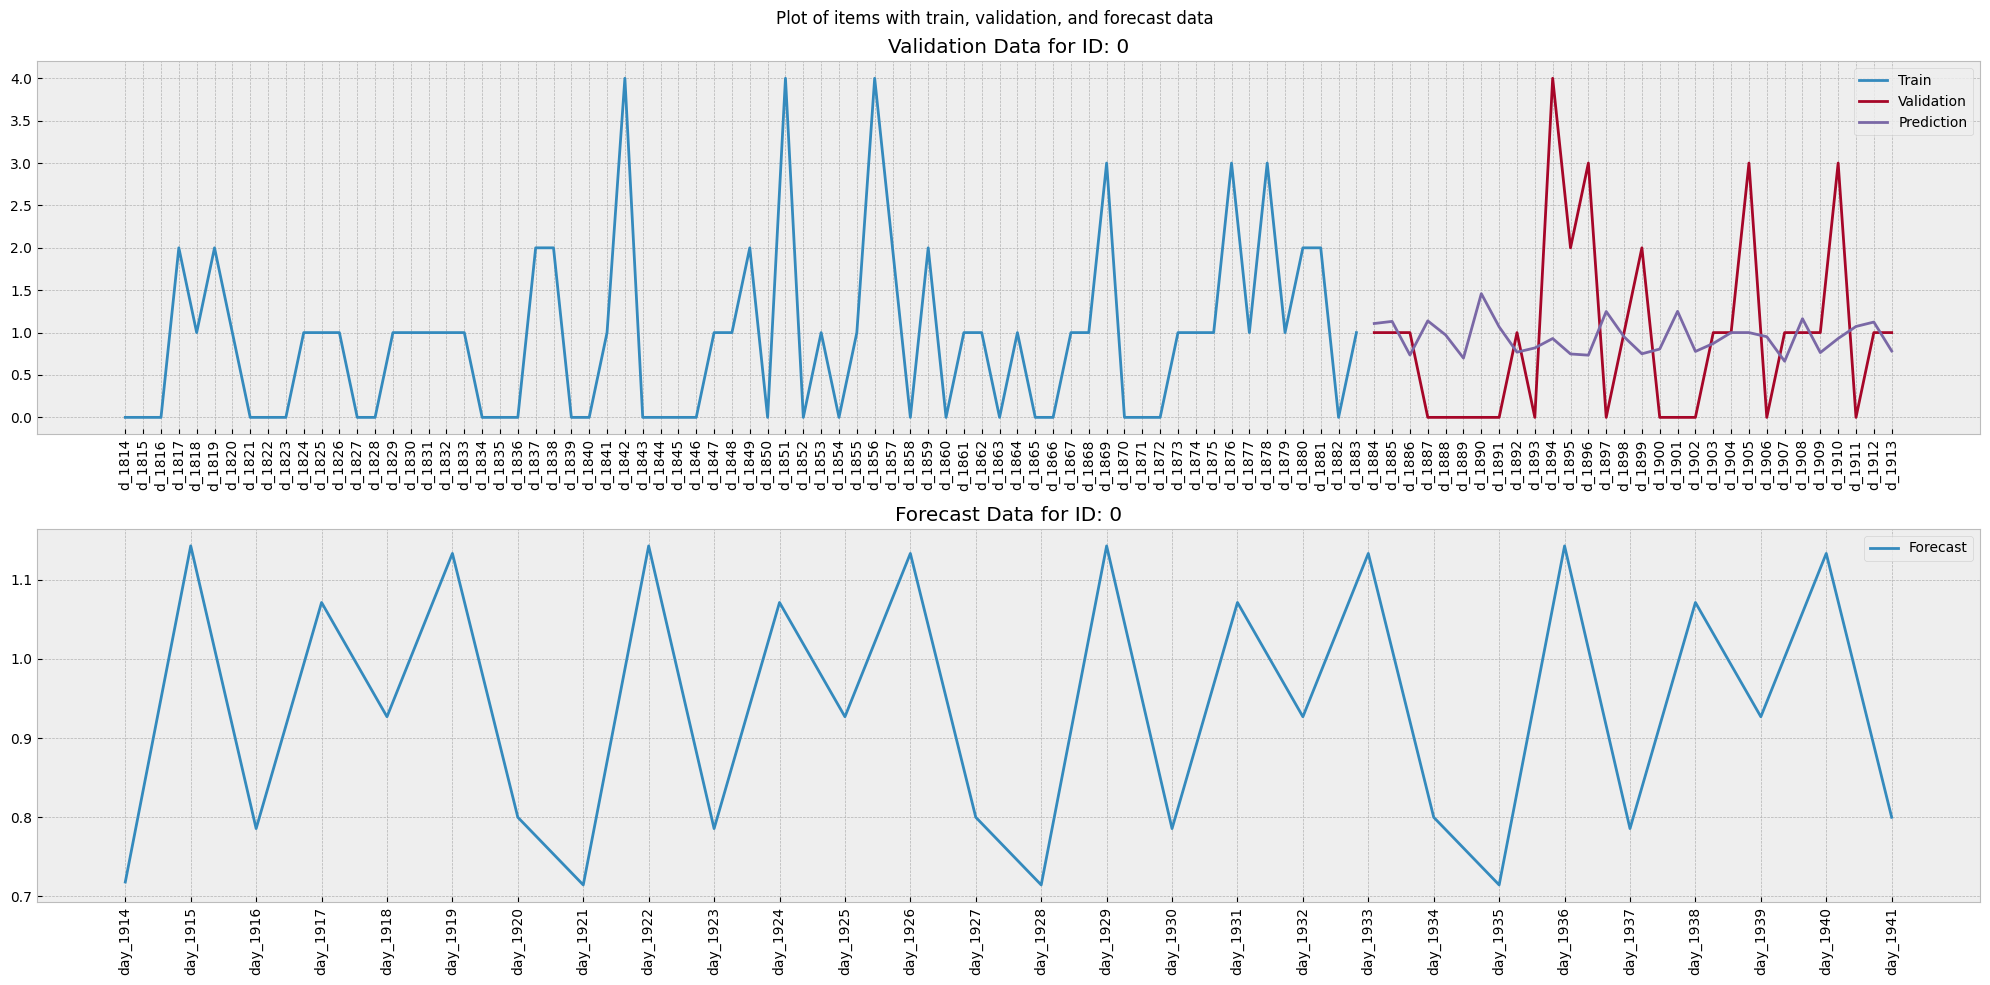

In [53]:
# Utility function to plot graph
def plot_graphs5(ids=[0, 2], pred=None, forecast_pred=None, pred_value=False):
    num_rows = len(ids)
    if pred_value:
        num_rows *= 2  # Double the rows if plotting predictions and forecasts
    
    fig, axs = plt.subplots(num_rows, 1, figsize=(20, 5 * num_rows))

    if num_rows == 1:
        axs = [axs]  # Ensure axs is a list even for a single subplot

    for idx, i in enumerate(ids):
        # Plotting validation data
        ax = axs[2 * idx if pred_value else idx]
        ax.plot(list(train_dataset.loc[i].keys()), train_dataset.loc[i].values, label='Train')
        ax.plot(list(val_dataset.loc[i].keys()), val_dataset.loc[i].values, label='Validation')
        if pred_value and pred is not None:
            ax.plot(list(val_dataset.loc[i].keys()), pred[i], label='Prediction')
        ax.tick_params(axis='x', rotation=90)
        ax.set_title(f'Validation Data for ID: {i}')
        ax.legend()

        # Plotting forecast data
        if pred_value and forecast_pred is not None:
            ax_forecast = axs[2 * idx + 1]
            future_dates = [f"day_{len(d_cols) + j + 1}" for j in range(forecast_pred.shape[1])]
            ax_forecast.plot(future_dates, forecast_pred[i], label='Forecast')
            ax_forecast.tick_params(axis='x', rotation=90)
            ax_forecast.set_title(f'Forecast Data for ID: {i}')
            ax_forecast.legend()

    plt.suptitle('Plot of items with train, validation, and forecast data')
    plt.tight_layout()
    plt.show()

# Example call for only training and validation data
ids = [0]
#plot_graphs4(ids)  # This will plot only training and validation data

# Example call with predictions and forecast data
plot_graphs5(ids, pred_arima, forecast_pred_arima, pred_value=True)  # This will plot train, validation, predictions, and forecast


In [40]:
error_arima

9.014322372078597

In [21]:
def plot_graphs1(ids=[0,2], pred=[], pred_value=False):
    fig, axs = plt.subplots(len(ids), 1, figsize=(20,5))
    if len(ids) != 1:
        axs = axs.flatten()

    if len(ids) == 1:
        # Plot historical data
        axs.plot(list(train_dataset.columns), train_dataset.loc[ids[0]].values, label='Train Data')
        axs.plot(list(val_dataset.columns), val_dataset.loc[ids[0]].values, label='Validation Data')
        
        # Plot forecast data
        if pred_value and pred.any():
            forecast_index = list(val_dataset.columns[-28:])  # Adjust to forecast period
            axs.plot(forecast_index, pred[ids[0]], label='Forecasted Data')
        
        axs.tick_params(axis='x', rotation=90)
    else:
        ax_id = 0
        for i in ids:
            # Plot historical data
            axs[ax_id].plot(list(train_dataset.columns), train_dataset.loc[i].values, label='Train Data')
            axs[ax_id].plot(list(val_dataset.columns), val_dataset.loc[i].values, label='Validation Data')
            
            # Plot forecast data
            if pred_value and pred.any():
                forecast_index = list(val_dataset.columns[-28:])  # Adjust to forecast period
                axs[ax_id].plot(forecast_index, pred[i], label='Forecasted Data')
            
            axs[ax_id].tick_params(axis='x', rotation=90)
            ax_id += 1

    plt.suptitle('Plot of few items with train and validation data respectively')
    plt.tight_layout()
    plt.show()


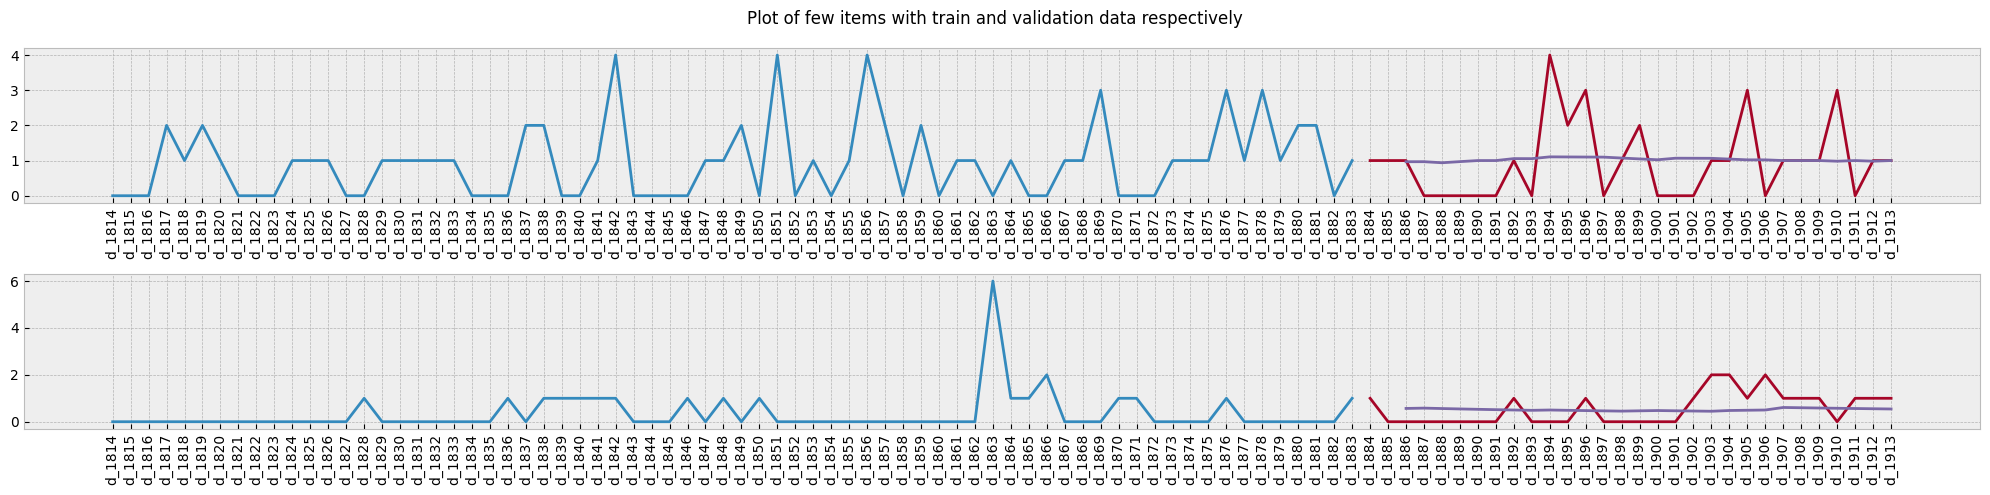

In [22]:
def moving_average_forecast(window=30, forecast_days=28):
    combined_dataset = np.concatenate([train_dataset.values, val_dataset.values], axis=1)
    predictions = []
    
    for i in range(forecast_days):
        if i == 0:
            predictions.append(np.mean(combined_dataset[:, -window:], axis=1))
        else:
            predictions.append(np.mean(combined_dataset[:, -(window + i):], axis=1))
    
    predictions = np.transpose(np.array(predictions))
    return predictions

# Forecast the next 28 days
pred_28_days = moving_average_forecast(window=30, forecast_days=28)

# You can plot the forecasted values
plot_graphs1(ids, pred_28_days, True)


In [ ]:
sales_data

In [ ]:
# Transpose the data so that the 'd_' columns become the index and the sales data becomes a Series
sales_series = sales_data.T.squeeze()
sales_series

In [ ]:
# Now plotting the data
sales_series.plot(figsize=(15, 5), title='FOODS_3_090_CA_3 sales by "d" number', color=next(color_cycle))
plt.show()

In [ ]:
# List of item ids for which we want to analyze sales
ids = ['FOODS_3_090_CA_3_validation', 'HOBBIES_1_234_CA_3_validation', 
       'HOUSEHOLD_1_118_CA_3_validation', 'HOBBIES_1_001_CA_1_validation']

In [ ]:
examples = []

for item_id in ids:
    # Extract sales data for the item
    data = sales_tr_val.loc[sales_tr_val['id'] == item_id][d_cols].T
    
    # Rename the sales column to match the item ID
    data = data.rename(columns={data.columns[0]: item_id})
    
    # Convert the index to a regular column named 'd'
    data = data.reset_index().rename(columns={'index': 'd'})
    
    # Merge with calendar data to get actual dates
    data = data.merge(calender, on='d')
    
    examples.append(data)


In [ ]:
examples[2]

In [ ]:
graph_ids = [2]  # Only plot the third item in the list

fig, ax = plt.subplots(figsize=(15, 10))  # Create a plot

# For each item ID to plot:
for graph_id in graph_ids:
    # Store the Series in a variable before plotting
    sales_series_2 = examples[graph_id].set_index('date')[ids[graph_id]]
    
    # Now plot the sales_series
    sales_series_2.plot(
        ax=ax, color=next(color_cycle), title=f'{ids[graph_id]} sales by actual sale dates')

plt.tight_layout()  # Adjust layout to avoid overlapping elements
plt.show()  # Display the plot


In [ ]:
sales_series_2

In [ ]:
# Return Mean absolute deviation value
def maddest(d, axis=None):
    return np.mean(np.absolute(d-np.mean(d,axis)), axis)

# Denoise the signal
def denoise(x, wavelet='db4',level=1):
    coeff = pywt.wavedec(x,wavelet,mode='per')
    sigma=(1/0.6745)*maddest(coeff[-level])
    
    uthresh=sigma*np.sqrt(2*np.log(len(x)))
    coeff[1:]=(pywt.threshold(i,value=uthresh,mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff,wavelet,mode='per')

In [ ]:
def list_to_df(list_obj):
    return pd.Series(list_obj)

import pywt

In [ ]:
fig, axs = plt.subplots(len(graph_ids), 1, figsize=(15, 10)) 
if len(graph_ids) != 1 : axs = axs.flatten() 

ax_id = 0
for graph_id in graph_ids:
    # Original data
    original_series = examples[graph_id].set_index('date')[ids[graph_id]]
    original_series.plot(figsize=(15, 5), color=next(color_cycle), label='Original',
                         title=f'{ids[graph_id]} sales along with wavelet denoised trend', 
                         ax=axs[ax_id] if len(graph_ids) != 1 else axs)
    
    # Denoised data
    denoised_series = list_to_df(denoise(original_series))
    denoised_series.plot(figsize=(15, 5), color=next(color_cycle), label='Denoised',
                         ax=axs[ax_id] if len(graph_ids) != 1 else axs)
    
    axs[ax_id].legend() if len(graph_ids) != 1 else axs.legend()
    ax_id += 1
    
plt.tight_layout()
plt.show()

In [ ]:
print(type(sales_series_2.index))

In [ ]:
sales_series_2.index = pd.to_datetime(sales_series_2.index)
print(type(sales_series_2.index))

In [ ]:
sales_series_2.index.inferred_freq

## Plotting Trend, seasonality, residual of a Time-series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sales_series_2, model='additive', period=365)
result.plot()
plt.show()

## Checking for Stationarity

1. Plotting rolling mean and variance is a good statistic to see if our series is stationary or non-stationary.


- If rolling statistic show a clear trend (upward or downward)-mean and show varying variance (increasing or decresing amplitude)-std then, a series is possibly non-stationary

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 5))

# Plot the raw data
ax.plot(sales_series_2.index, sales_series_2, label='raw data')

# Plot the rolling mean
ax.plot(sales_series_2.rolling(window=12).mean(), label="rolling mean")

# Plot the rolling standard deviation (multiplied by 10 for better visualization)
ax.plot(sales_series_2.rolling(window=12).std() * 10, label="rolling std (x10)")

# Add a legend outside the plot area
ax.legend(bbox_to_anchor=(1.01, 1.01))

# Display the plot
plt.show()

See whether the data is stationary or not

2. Augmented Dickey-fuller test
- This test will give a result called a “test-statistic”, based on which you can say, with different levels (or percentage) of confidence, if the time-series is stationary or not.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(data):
    print("Is the data stationary?")
    dftest = adfuller(data, autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values:")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k,v,"not" if v<dftest[0] else "",100-int(k[:-1])))

In [ ]:
adfuller_test(sales_series_2)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create a plot

# For each item ID to plot:
for graph_id in graph_ids:
    # Store the Series in a variable before plotting
    sales_series_3 = examples[graph_id][:99][ids[graph_id]]
    
    # Now plot the sales_series
    sales_series_3.plot(
        ax=ax, color=next(color_cycle), marker='o', title=f'Sampled zoomed area of {ids[graph_id]} sales')

plt.tight_layout()  # Adjust layout to avoid overlapping elements
plt.show()  # Display the plot

In [ ]:
sales_series_3

In [ ]:
# Return Mean absolute deviation value
def maddest(d, axis=None):
    return np.mean(np.absolute(d-np.mean(d,axis)), axis)

# Denoise the signal
def denoise(x, wavelet='db4',level=1):
    coeff = pywt.wavedec(x,wavelet,mode='per')
    sigma=(1/0.6745)*maddest(coeff[-level])
    
    uthresh=sigma*np.sqrt(2*np.log(len(x)))
    coeff[1:]=(pywt.threshold(i,value=uthresh,mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff,wavelet,mode='per')

In [ ]:
def list_to_df(list_obj):
    return pd.Series(list_obj)

In [ ]:
import pywt

In [ ]:
fig, axs = plt.subplots(len(graph_ids), 1, figsize=(15, 10)) 
if len(graph_ids) != 1 : axs = axs.flatten() 

ax_id = 0
for graph_id in graph_ids:
    # Original data
    original_series = examples[graph_id][ids[graph_id]][:99]
    original_series.plot(figsize=(15, 5), color=next(color_cycle), marker='o', label='Original',
                         title=f'Sampled zoomed area of {ids[graph_id]} sales along with wavelet denoised trend', 
                         ax=axs[ax_id] if len(graph_ids) != 1 else axs)
    
    # Denoised data
    denoised_series = list_to_df(denoise(original_series))
    denoised_series.plot(figsize=(15, 5), color=next(color_cycle), label='Denoised',
                         ax=axs[ax_id] if len(graph_ids) != 1 else axs)
    
    axs[ax_id].legend() if len(graph_ids) != 1 else axs.legend()
    ax_id += 1
    
plt.tight_layout()
plt.show()

In [ ]:
denoised_series